In [1]:
# !pip install ipython
# !pip install wordCloud
# !pip install chart-studio

In [52]:
%matplotlib inline
from IPython.display import Image,HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import chart_studio
import chart_studio.plotly as py

In [53]:
sns.set_style('whitegrid')
sns.set(font_scale=1.25)

In [54]:
pd.set_option('display.max_colwidth', 50)

In [55]:
df = pd.read_csv(r'C:\Users\shwet\Music\final_recommender\movies_metadata.csv')

C:\Users\shwet\AppData\Local\Temp\ipykernel_5524\3855572098.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\shwet\Music\final_recommender\movies_metadata.csv')


In [56]:
df.head(1).transpose()

,0
adult,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ..."
budget,30000000
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
homepage,http://toystory.disney.com/toy-story
id,862
imdb_id,tt0114709
original_language,en
original_title,Toy Story
overview,"Led by Woody, Andy's toys live happily in his ..."


In [57]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [58]:
df.shape

(45466, 24)

In [59]:
df.size

1091184

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [61]:
df = df.drop(['imdb_id'], axis=1)

In [62]:
df[df['original_title'] != df['title']][['title','original_title']].head()

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal


In [63]:
df = df.drop('original_title', axis=1)

In [64]:
df[df['revenue']==0][['title','revenue']]

,title,revenue
2,Grumpier Old Men,0.0
6,Sabrina,0.0
7,Tom and Huck,0.0
11,Dracula: Dead and Loving It,0.0
21,Copycat,0.0
...,...,...
45461,Subdue,0.0
45462,Century of Birthing,0.0
45463,Betrayal,0.0
45464,Satan Triumphant,0.0


In [65]:
df['revenue']=df['revenue'].replace(0,np.nan)

In [66]:
df[df['budget']==0]

,adult,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count


In [67]:
df['budget'].info

<bound method Series.info of 0        30000000
1        65000000
2               0
3        16000000
4               0
           ...   
45461           0
45462           0
45463           0
45464           0
45465           0
Name: budget, Length: 45466, dtype: object>

In [68]:
df.isnull().sum().sum()

143597

In [69]:
df['budget']=pd.to_numeric(df['budget'],errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

In [70]:
df['return'] = df['revenue']/df['budget']

In [71]:
df[df['return'].isnull()].shape

(40085, 23)

In [72]:
df['release_date']

0        1995-10-30
1        1995-12-15
2        1995-12-22
3        1995-12-22
4        1995-02-10
            ...    
45461           NaN
45462    2011-11-17
45463    2003-08-01
45464    1917-10-21
45465    2017-06-09
Name: release_date, Length: 45466, dtype: object

In [73]:
df['year']=pd.to_datetime(df['release_date'],errors='coerce').apply(lambda x: str(x).split('-')[0] if x!= np.nan else np.nan)

In [74]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [75]:
df[df['adult']=='True'][['title']]

,title
19489,Erotic Nights of the Living Dead
28701,Standoff
31934,Electrical Girl
32113,Diet of Sex
39901,Amateur Porn Star Killer 2
39902,The Band
40574,The Sinful Dwarf
41009,Adulterers
43090,Half -Life


In [76]:
df=df.drop('adult',axis=1)

In [77]:
df.iloc[0:2,5:9]

,original_language,overview,popularity,poster_path
0,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,en,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg


In [78]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

In [79]:
df['poster_path']

0        <img src='http://image.tmdb.org/t/p/w185//rhIR...
1        <img src='http://image.tmdb.org/t/p/w185//vzmL...
2        <img src='http://image.tmdb.org/t/p/w185//6ksm...
3        <img src='http://image.tmdb.org/t/p/w185//16XO...
4        <img src='http://image.tmdb.org/t/p/w185//e64s...
                               ...                        
45461    <img src='http://image.tmdb.org/t/p/w185//jlds...
45462    <img src='http://image.tmdb.org/t/p/w185//xZkm...
45463    <img src='http://image.tmdb.org/t/p/w185//d5bX...
45464    <img src='http://image.tmdb.org/t/p/w185//aorB...
45465    <img src='http://image.tmdb.org/t/p/w185//s5Uk...
Name: poster_path, Length: 45466, dtype: object

In [80]:
df['title']=df['title'].astype('str')
df['overview']=df['overview'].astype('str')

In [81]:
title_corpus=' '.join(df['title'])
overview_corpus=' '.join(df['overview'])

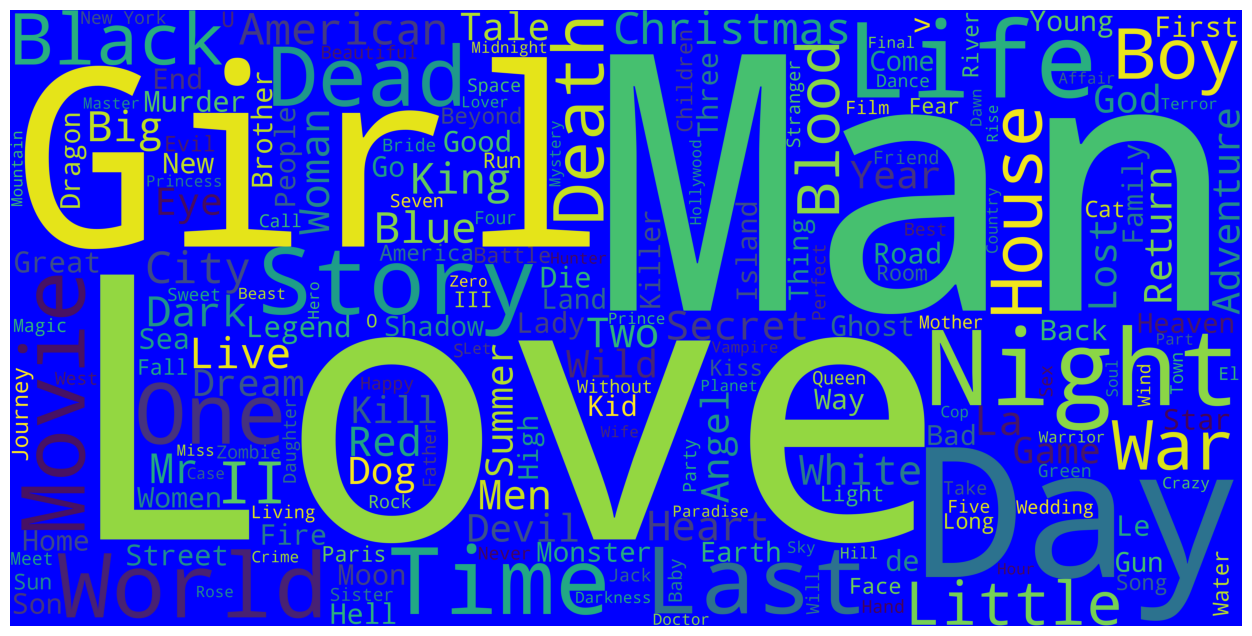

In [82]:
title_wordcloud = WordCloud(stopwords=STOPWORDS,background_color='blue',height=2000,width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

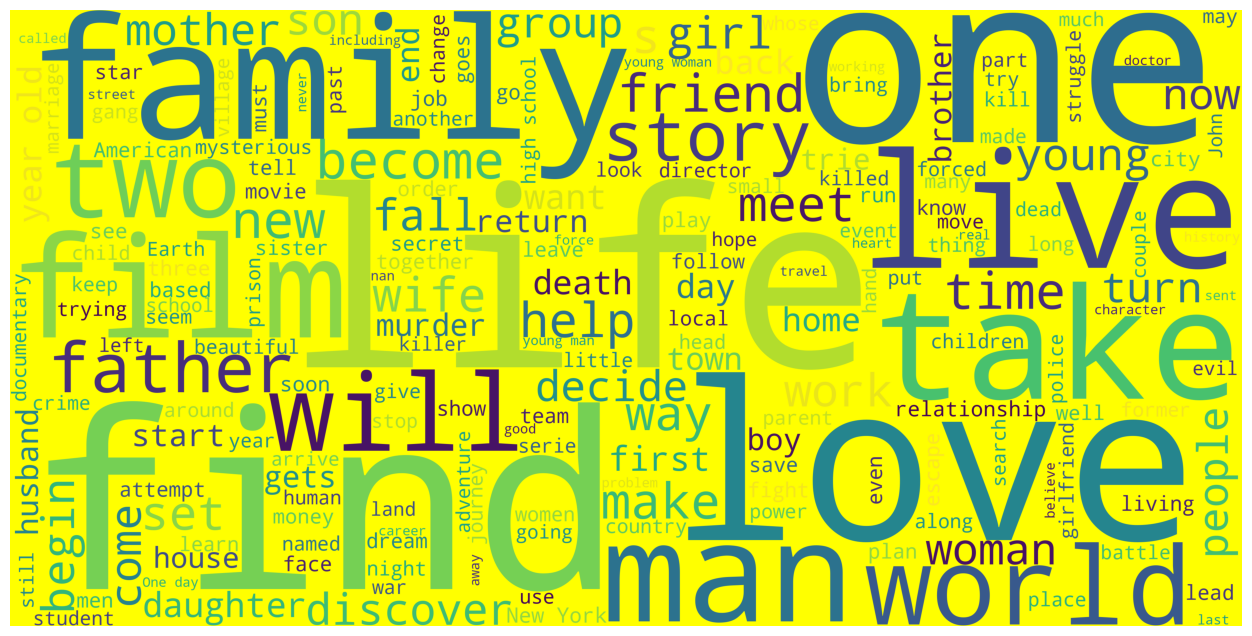

In [83]:
overview_wordcloud=WordCloud(stopwords=STOPWORDS,background_color='yellow',height=2000,width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [84]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year'],
      dtype='object')

In [85]:
df['production_countries'][3445]

"[{'iso_3166_1': 'BR', 'name': 'Brazil'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [86]:
df['production_countries']=df['production_countries'].fillna('[]').apply(ast.literal_eval)
df.head(2).transpose()

,0,1
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN
budget,30000000.0,65000000.0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
homepage,http://toystory.disney.com/toy-story,NaN
id,862,8844
original_language,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...
popularity,21.946943,17.015539
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...
production_companies,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'name': 'TriStar Pictures', 'id': 559}, {'na..."


In [87]:
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [92]:
df['production_countries']
df.head(2).transpose()

,0,1
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN
budget,30000000.0,65000000.0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
homepage,http://toystory.disney.com/toy-story,NaN
id,862,8844
original_language,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...
popularity,21.946943,17.015539
poster_path,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//vzmL...
production_companies,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'name': 'TriStar Pictures', 'id': 559}, {'na..."


In [89]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)

C:\Users\shwet\AppData\Local\Temp\ipykernel_5524\2201751269.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)


In [94]:
s.name = 'countries'

In [95]:
df['production_countries'][326]

['United Kingdom', 'United States of America']

In [96]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


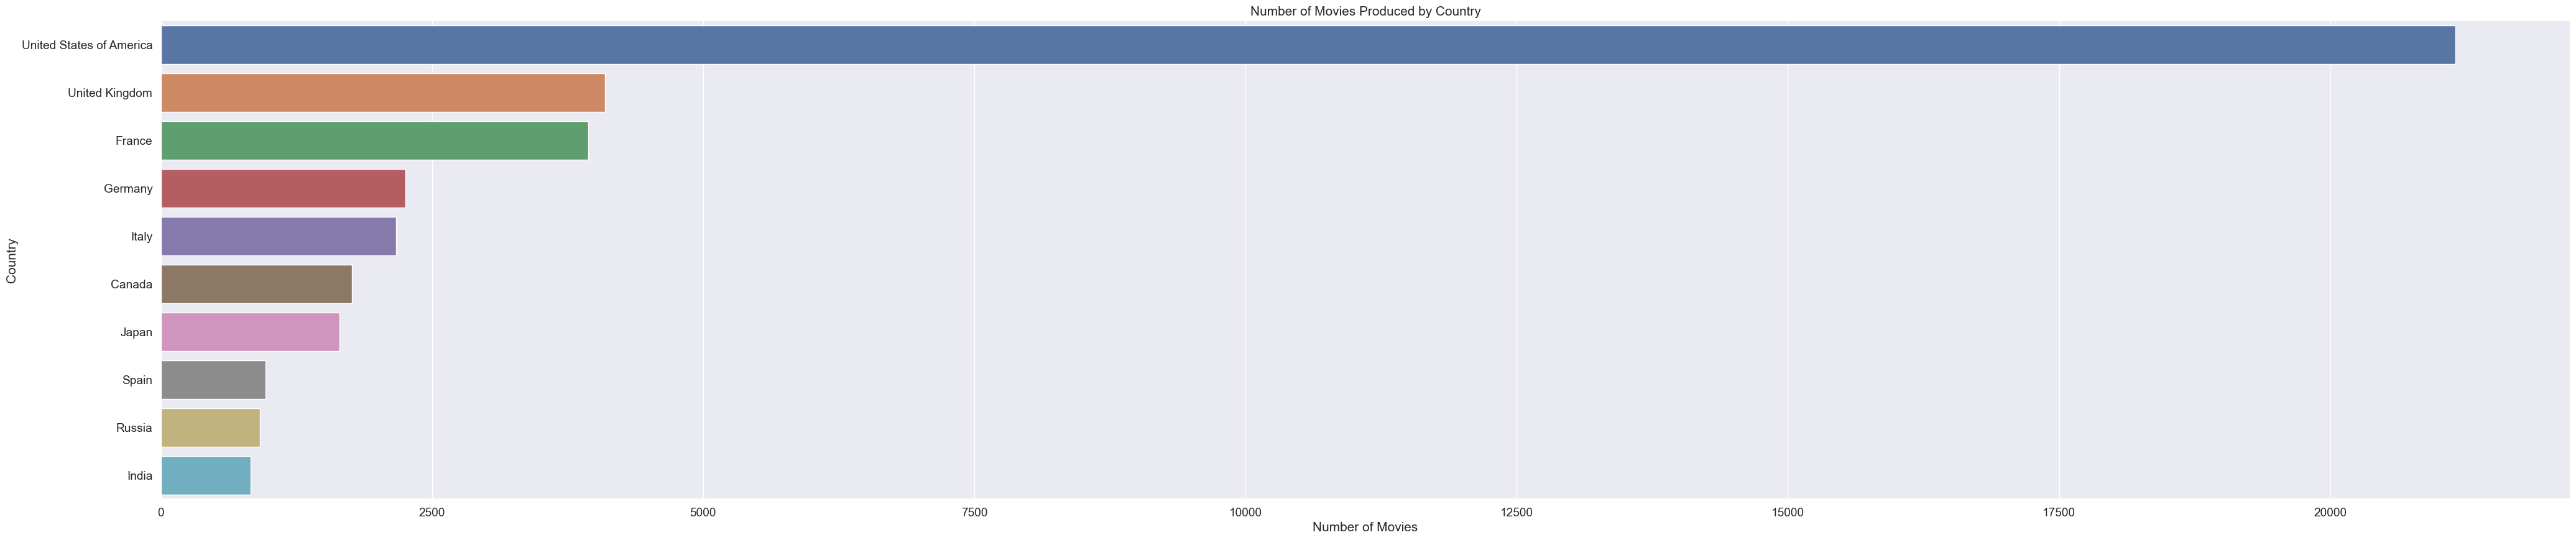

In [110]:
plt.figure(figsize=(50, 10))  # Adjust the figure size if needed
sns.barplot(x='num_movies', y='country', data=con_df.head(10), orient='h')
plt.xlabel('Number of Movies')
plt.ylabel('Country')
plt.title('Number of Movies Produced by Country')
plt.show()

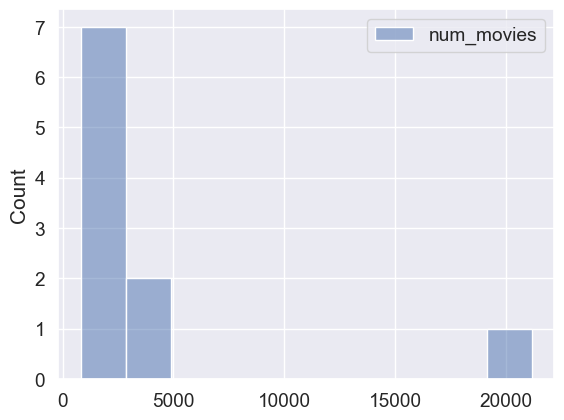

<Figure size 1600x1600 with 0 Axes>

In [111]:
sns.histplot(con_df.head(10))
plt.figure(figsize=(16,16))
plt.show()

In [43]:
con_df[con_df['country']!='United States of America']

,num_movies,country
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
...,...,...
155,1,Madagascar
156,1,Somalia
157,1,Kuwait
158,1,Martinique


In [112]:
df_fran=df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]
df_fran

C:\Users\shwet\AppData\Local\Temp\ipykernel_5524\80013913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)


,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,return,year
0,Toy Story Collection,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[{'name': 'Pixar Animation Studios', 'id': 3}]",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,12.451801,1995
2,Grumpy Old Men Collection,NaN,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,en,A family wedding reignites the ancient feud be...,11.7129,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,NaN,1995
4,Father of the Bride Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,en,Just when George Banks has recovered from his ...,8.387519,<img src='http://image.tmdb.org/t/p/w185//e64s...,"[{'name': 'Sandollar Productions', 'id': 5842}...",...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,NaN,1995
9,James Bond Collection,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,en,James Bond must unmask the mysterious head of ...,14.686036,<img src='http://image.tmdb.org/t/p/w185//5c0o...,"[{'name': 'United Artists', 'id': 60}, {'name'...",...,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,6.072311,1995
12,Balto Collection,NaN,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,en,An outcast half-wolf risks his life to prevent...,12.140733,<img src='http://image.tmdb.org/t/p/w185//gV5P...,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,NaN,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45355,The Carry On Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,24568,en,Bertram Oliphant West (also known as Bo West) ...,1.114848,<img src='http://image.tmdb.org/t/p/w185//8nif...,"[{'name': 'The Rank Organisation', 'id': 364},...",...,95.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Carry On Follow That Camel,False,6.1,19.0,NaN,1967
45358,The Carry On Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,19307,en,Sid and Bernie keep having their amorous inten...,4.103723,<img src='http://image.tmdb.org/t/p/w185//dyas...,"[{'name': 'The Rank Organisation', 'id': 364}]",...,88.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fun and games in the great outdoors!,Carry On Camping,False,6.5,25.0,NaN,1969
45369,The Carry On Collection,NaN,"[{'id': 35, 'name': 'Comedy'}]",NaN,21251,en,Captain S. Melly takes over as the new Command...,0.846154,<img src='http://image.tmdb.org/t/p/w185//xd9q...,"[{'name': 'The Rank Organisation', 'id': 364}]",...,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Carry On England,False,4.8,15.0,NaN,1976
45371,DC Super Hero Girls Collection,NaN,"[{'id': 16, 'name': 'Animation'}]",NaN,460135,en,"When Supergirl, Wonder Woman, Batgirl, Bumbleb...",8.413734,<img src='http://image.tmdb.org/t/p/w185//niLX...,"[{'name': 'Warner Bros. Animation', 'id': 2785}]",...,0.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,LEGO DC Super Hero Girls: Brain Drain,False,10.0,2.0,NaN,2017


In [113]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [114]:
fran_pivot

,belongs_to_collection,count,mean,sum
0,... Has Fallen Collection,2,183390043.5,366780087.0
1,00 Schneider Filmreihe,0,NaN,0.0
2,08/15 Collection,0,NaN,0.0
3,100 Girls Collection,0,NaN,0.0
4,101 Dalmatians (Animated) Collection,1,215880014.0,215880014.0
...,...,...,...,...
1690,Сказки Чуковского,0,NaN,0.0
1691,Чебурашка и крокодил Гена,0,NaN,0.0
1692,Что Творят мужчины! (Коллекция),0,NaN,0.0
1693,男はつらいよ シリーズ,0,NaN,0.0


In [47]:
fran_pivot.sort_values('sum', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
646,James Bond Collection,26,2.733450e+08,7.106970e+09
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09
1550,Transformers Collection,5,8.732202e+08,4.366101e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
1491,The Twilight Collection,5,6.684215e+08,3.342107e+09
610,Ice Age Collection,5,6.433417e+08,3.216709e+09
666,Jurassic Park Collection,4,7.578710e+08,3.031484e+09


In [48]:
fran_pivot.sort_values('mean', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
112,Avatar Collection,1,2.787965e+09,2.787965e+09
1245,The Avengers Collection,2,1.462481e+09,2.924962e+09
479,Frozen Collection,1,1.274219e+09,1.274219e+09
446,Finding Nemo Collection,2,9.844532e+08,1.968906e+09
1352,The Hobbit Collection,3,9.785078e+08,2.935523e+09
1388,The Lord of the Rings Collection,3,9.721816e+08,2.916545e+09
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
325,Despicable Me Collection,4,9.227676e+08,3.691070e+09
968,Pirates of the Caribbean Collection,5,9.043154e+08,4.521577e+09


In [49]:
fran_pivot.sort_values('count', ascending=False).head(10)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


In [50]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [51]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

C:\Windows\Temp\ipykernel_7388\2015865688.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)


In [52]:
com_df = df.drop('production_companies', axis=1).join(s)

In [53]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']

In [54]:
com_sum

,Total
companies,
Warner Bros.,6.352519e+10
Universal Pictures,5.525919e+10
Paramount Pictures,4.880819e+10
Twentieth Century Fox Film Corporation,4.768775e+10
Walt Disney Pictures,4.083727e+10
...,...
Gädda Five,0.000000e+00
Gávea Filmes,0.000000e+00
Gynormous Pictures,0.000000e+00


In [55]:
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

In [56]:
com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [57]:
com_pivot

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
...,...,...,...
Gädda Five,0.000000e+00,NaN,0
Gávea Filmes,0.000000e+00,NaN,0
Gynormous Pictures,0.000000e+00,NaN,0


In [58]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
companies,,,
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78


In [59]:
com_pivot.sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Abu Dhabi Film Commission,1.506249e+09,1.506249e+09,1
"Colorado Office of Film, Television & Media",1.506249e+09,1.506249e+09,1
Deluxe Digital Studios,1.153304e+09,1.153304e+09,1
Vita-Ray Dutch Productions (III),1.153304e+09,1.153304e+09,1
Ian Bryce Productions,1.091405e+09,1.091405e+09,1
Black Hangar Studios,1.056057e+09,1.056057e+09,1
Truenorth Productions,2.074024e+09,1.037012e+09,2
Second Mate Productions,2.026660e+09,1.013330e+09,2
3Foot7,9.560198e+08,9.560198e+08,1


In [60]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
companies,,,
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19


In [61]:
df['original_language'].drop_duplicates().shape[0]

93

In [62]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,32269,en
fr,2438,fr
it,1529,it
ja,1350,ja
de,1080,de


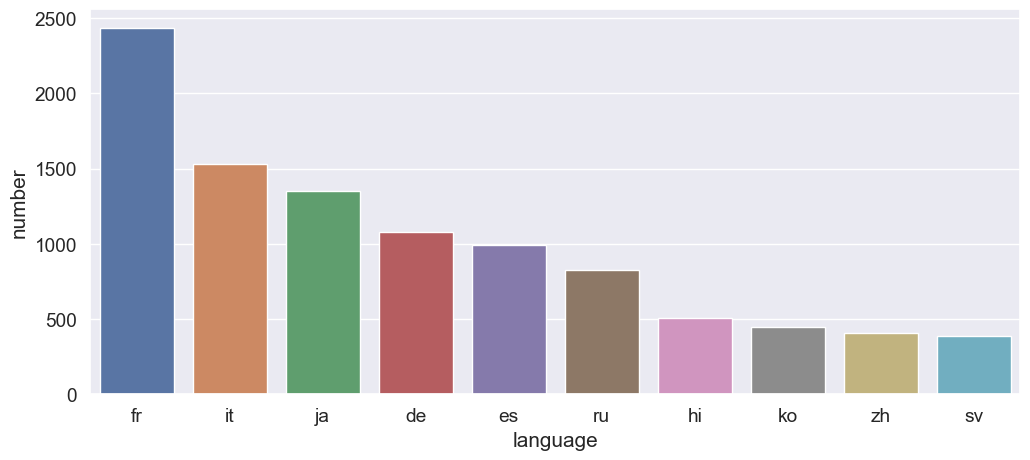

In [63]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

In [64]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [65]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df['vote_count'] = df['vote_count'].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [66]:
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

C:\Windows\Temp\ipykernel_7388\2251587667.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['popularity'].fillna(df['popularity'].median()))


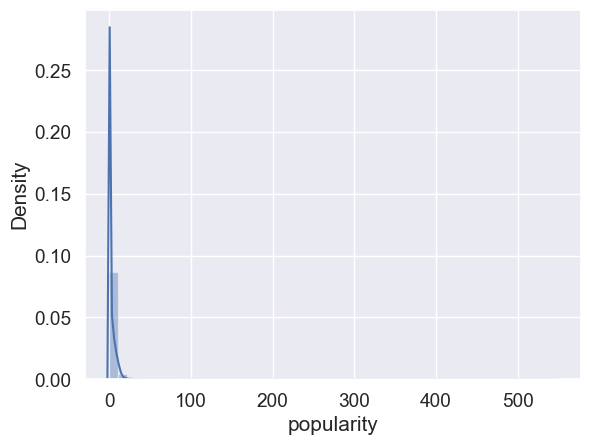

In [67]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

<Axes: ylabel='Frequency'>

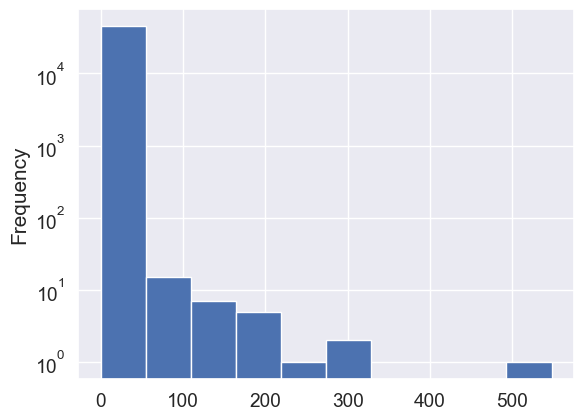

In [68]:
df['popularity'].plot(logy=True, kind='hist')

In [69]:
df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [70]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [71]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


In [72]:
df['vote_average']=df['vote_average'].replace(0,np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

C:\Windows\Temp\ipykernel_7388\1411771687.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))


<Axes: xlabel='vote_average', ylabel='Density'>

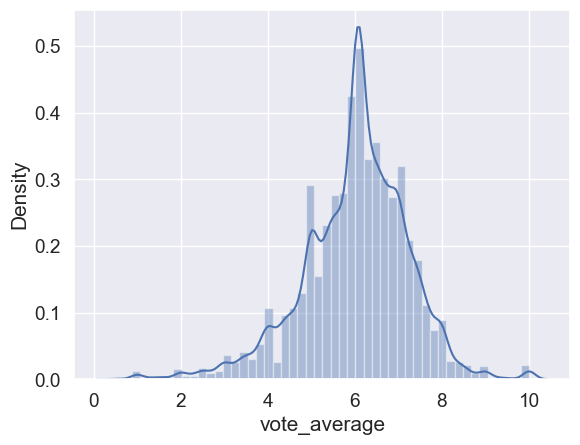

In [73]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

In [74]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


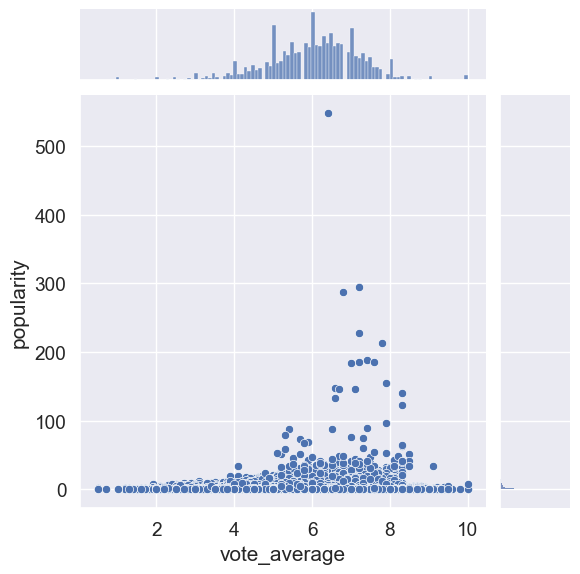

In [75]:
sns.jointplot(x='vote_average', y='popularity', data=df)

In [76]:
df['vote_average'].corr(df['popularity'])

0.09664429948684439

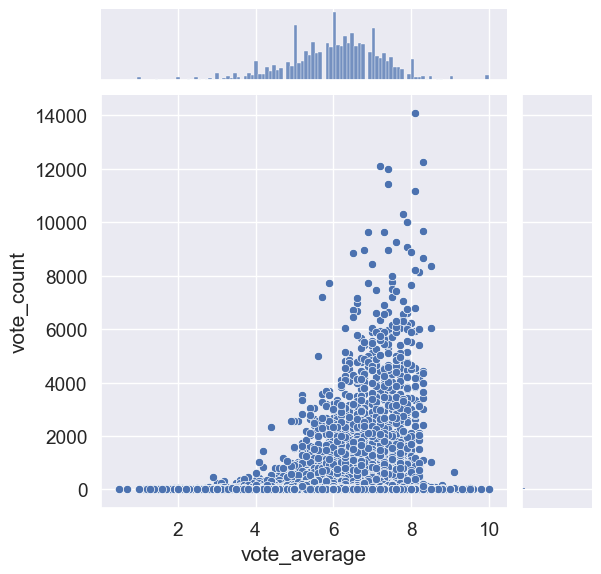

In [77]:
sns.jointplot(x='vote_average', y='vote_count', data=df)

In [78]:
df['vote_average'].corr(df['vote_count'])

0.12309607970836023

In [79]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [80]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [81]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [82]:
df['day'] = df['release_date'].apply(get_day)
df['month'] = df['release_date'].apply(get_month)

<Axes: title={'center': 'Number of Movies released in a particular month.'}, xlabel='month', ylabel='count'>

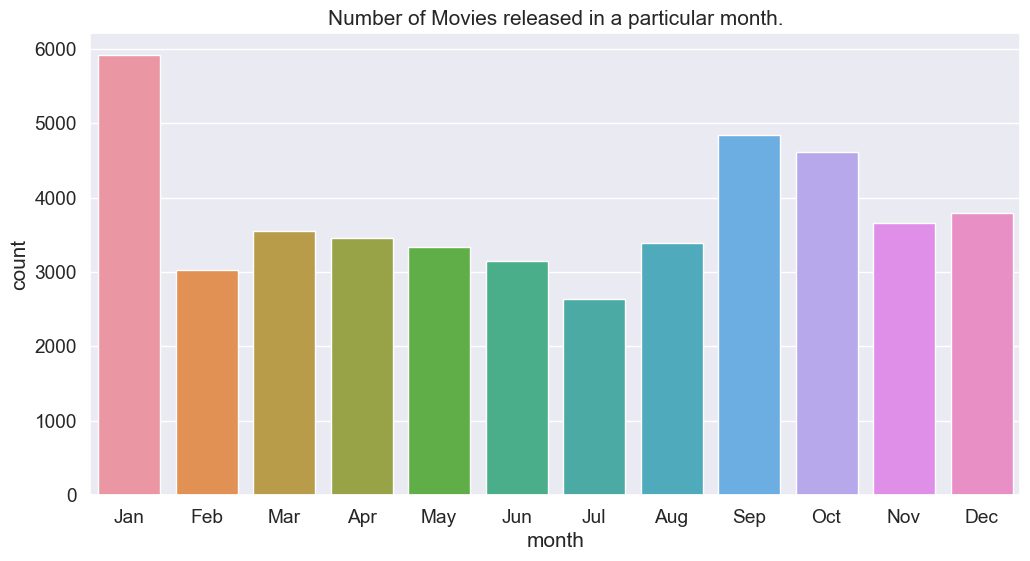

In [83]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=df, order=month_order)

<Axes: title={'center': 'Average Gross by the Month for Blockbuster Movies'}, xlabel='mon', ylabel='revenue'>

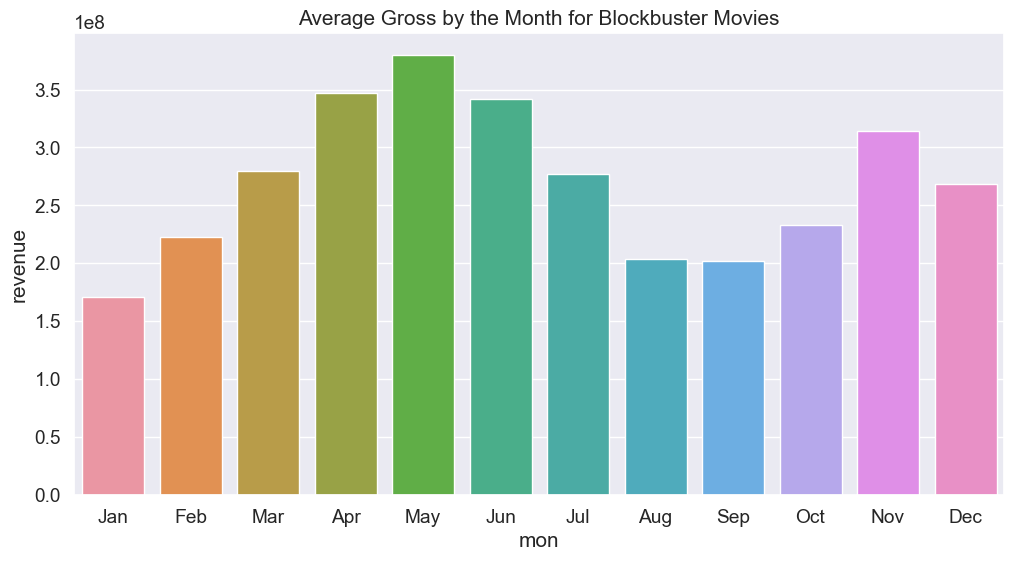

In [84]:
month_mean = pd.DataFrame(df[df['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)

(0.0, 12.0)

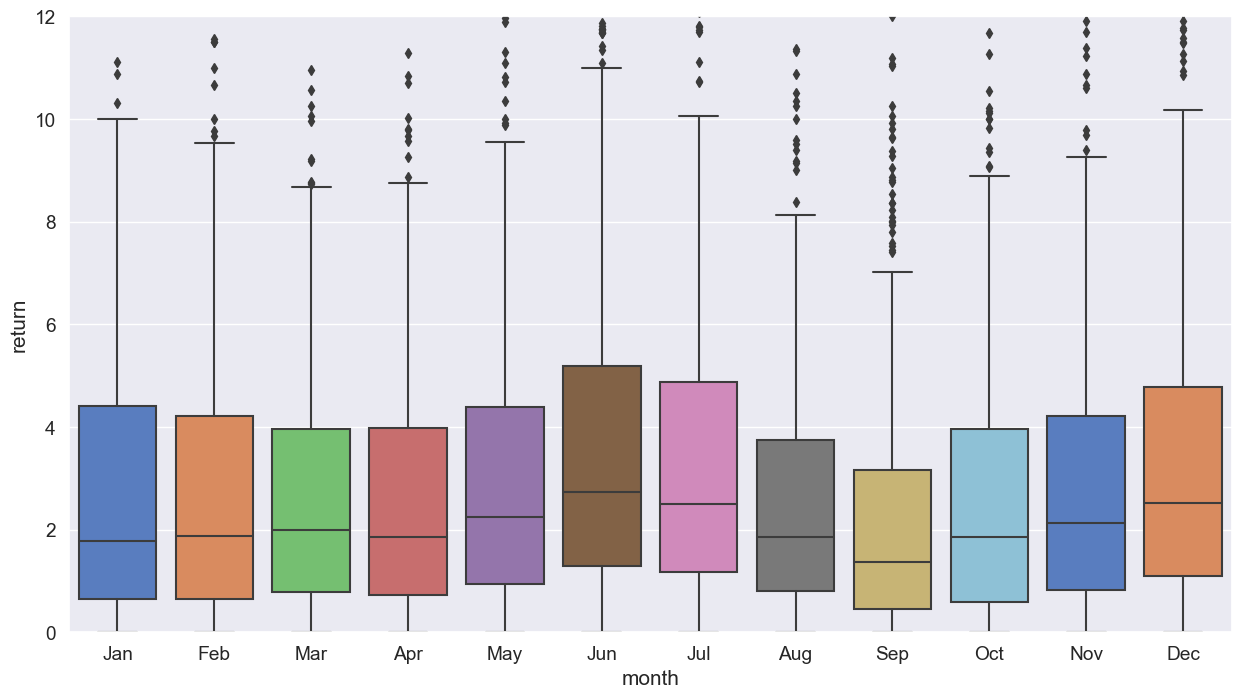

In [85]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='month', y='return', data=df[df['return'].notnull()], palette="muted", ax =ax, order=month_order)
ax.set_ylim([0, 12])

<Axes: title={'center': 'Number of Movies released on a particular day.'}, xlabel='day', ylabel='count'>

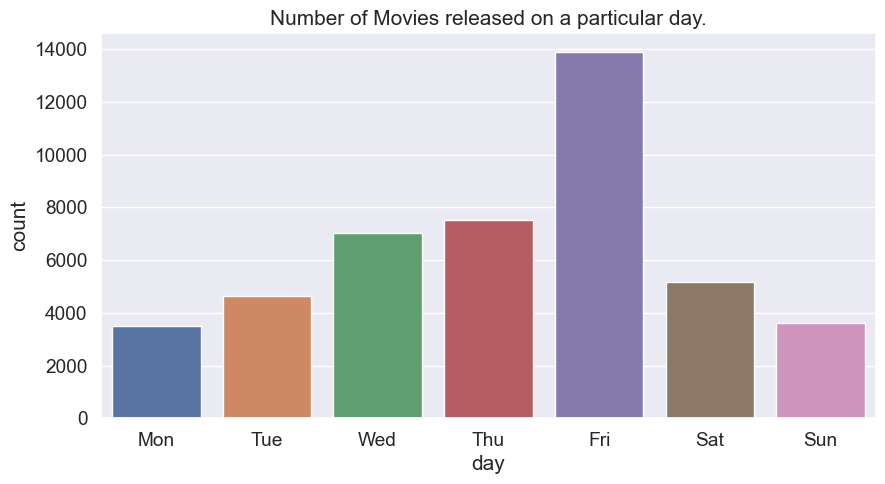

In [86]:
plt.figure(figsize=(10,5))
plt.title("Number of Movies released on a particular day.")
sns.countplot(x='day', data=df, order=day_order)

<Axes: xlabel='year'>

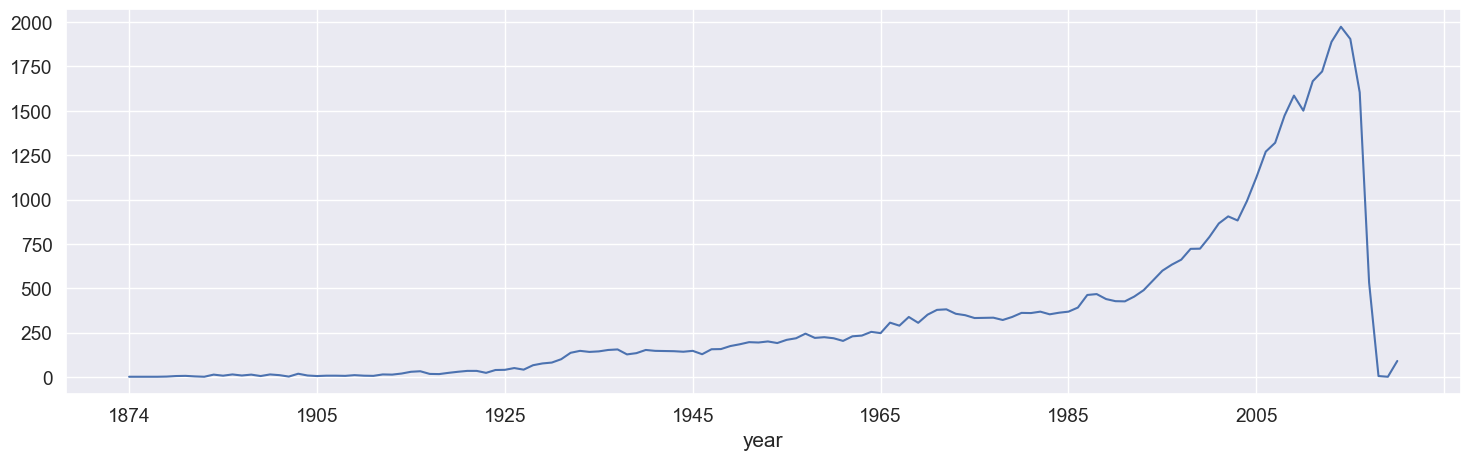

In [87]:
year_count = df.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
year_count.plot()

In [88]:
df[df['year'] != 'NaT'][['title', 'year']].sort_values('year').head(10)

,title,year
34940,Passage of Venus,1874
34937,Sallie Gardner at a Gallop,1878
41602,Buffalo Running,1883
34933,Man Walking Around a Corner,1887
34934,Accordion Player,1888
34938,Traffic Crossing Leeds Bridge,1888
34936,"Monkeyshines, No. 2",1890
34939,London's Trafalgar Square,1890
34935,"Monkeyshines, No. 1",1890
41194,Mosquinha,1890


In [89]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

<Axes: xlabel='year', ylabel='month'>

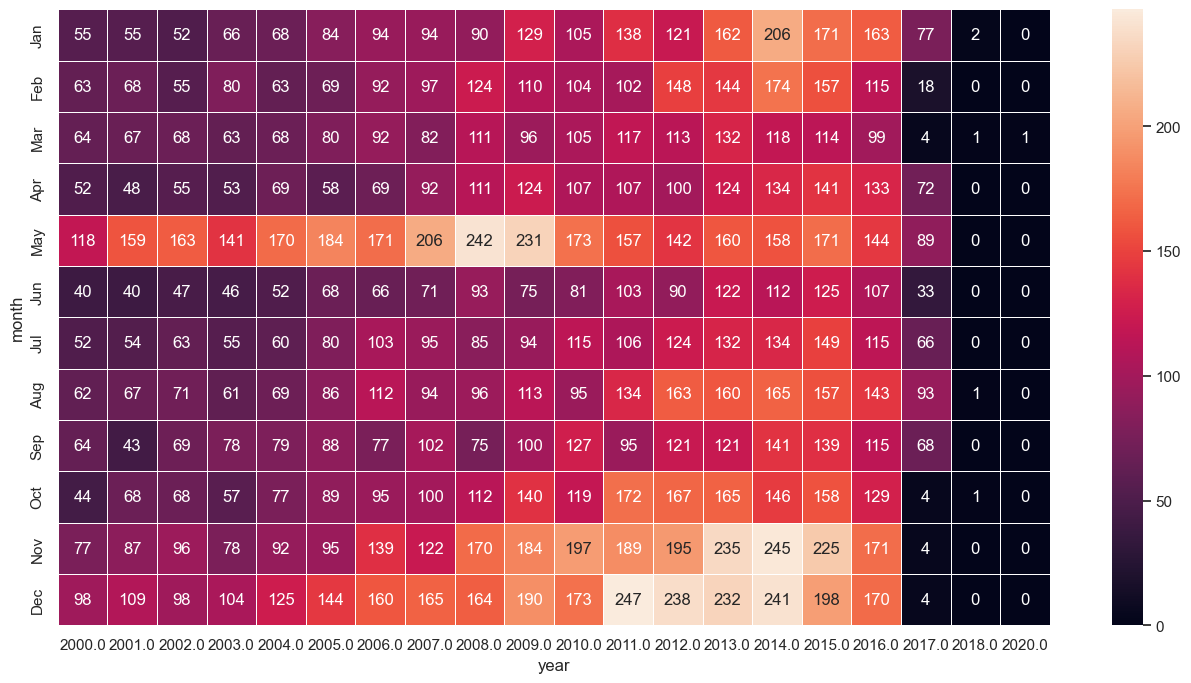

In [90]:
df_21 = df.copy()
df_21['year'] = df_21[df_21['year'] != 'NaT']['year'].astype(int)
df_21 = df_21[df_21['year'] >=2000]
hmap_21 = pd.pivot_table(data=df_21, index='month', columns='year', aggfunc='count', values='title')
hmap_21 = hmap_21.fillna(0)
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap_21, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)


In [91]:
sns.set(font_scale=1.25)

In [92]:
df['status'].value_counts()

Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [93]:
df['spoken_languages'] = df['spoken_languages'].fillna('[]').apply(ast.literal_eval).apply(lambda x: len(x) if isinstance(x, list) else np.nan)

In [94]:
df['spoken_languages'].value_counts()

1     33736
2      5371
0      3835
3      1705
4       550
5       178
6        62
7        14
8         6
9         5
10        1
12        1
19        1
13        1
Name: spoken_languages, dtype: int64

In [95]:
df[df['spoken_languages'] >= 10][['title', 'year', 'spoken_languages']].sort_values('spoken_languages', ascending=False)

,title,year,spoken_languages
22235,Visions of Europe,2004,19
35288,The Testaments,2000,13
14093,To Each His Own Cinema,2007,12
8789,The Adventures of Picasso,1978,10


In [96]:
df['spoken_languages'].corr(df['return'])

0.013460680667654889

In [97]:
df['runtime'].describe()

count    45203.000000
mean        94.128199
std         38.407810
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

In [98]:
df['runtime'] = df['runtime'].astype('float')

C:\Windows\Temp\ipykernel_7388\1721577354.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])


<Axes: xlabel='runtime', ylabel='Density'>

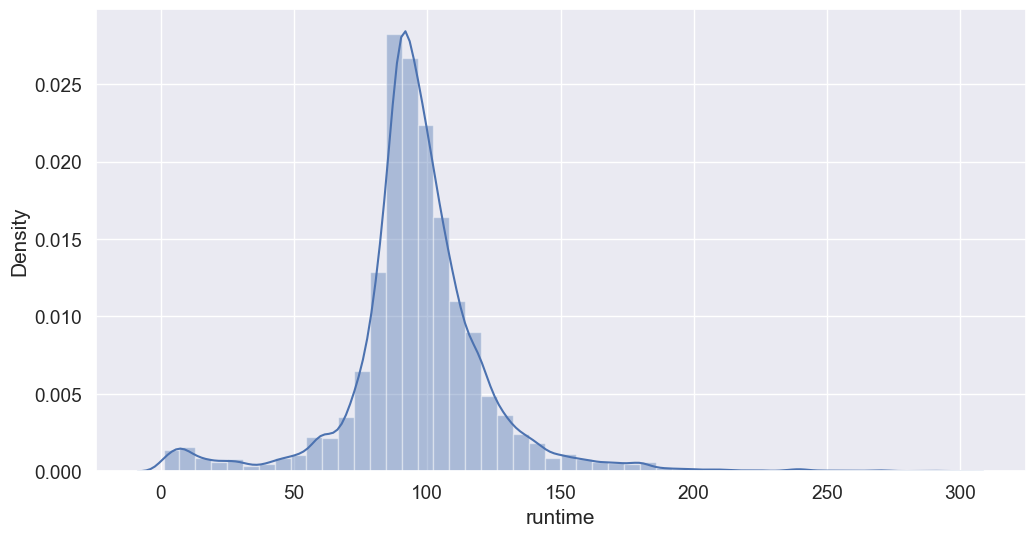

In [99]:
plt.figure(figsize=(12,6))
sns.distplot(df[(df['runtime'] < 300) & (df['runtime'] > 0)]['runtime'])

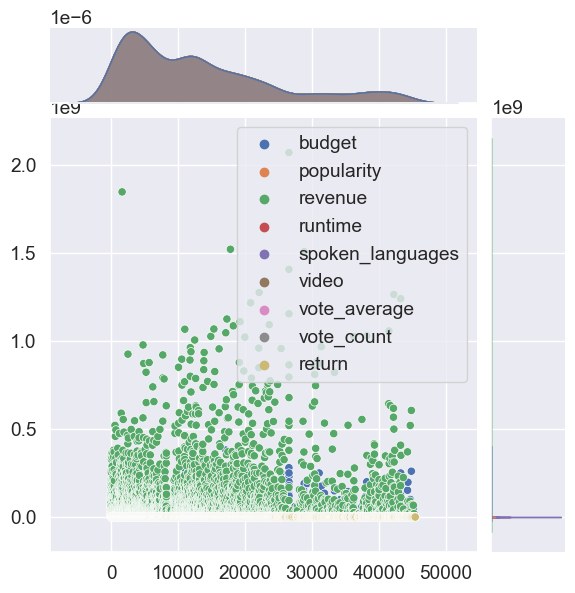

In [100]:
df_mat = df[(df['return'].notnull()) & (df['runtime'] > 0) & (df['return'] < 10)]
sns.jointplot(data=df_mat)
plt.show()

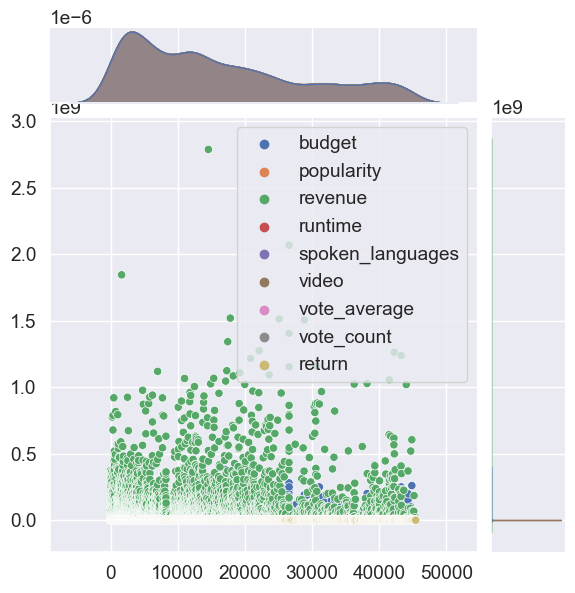

In [101]:
df_mat = df[(df['budget'].notnull()) & (df['runtime'] > 0)]
sns.jointplot(data=df_mat)
plt.show()

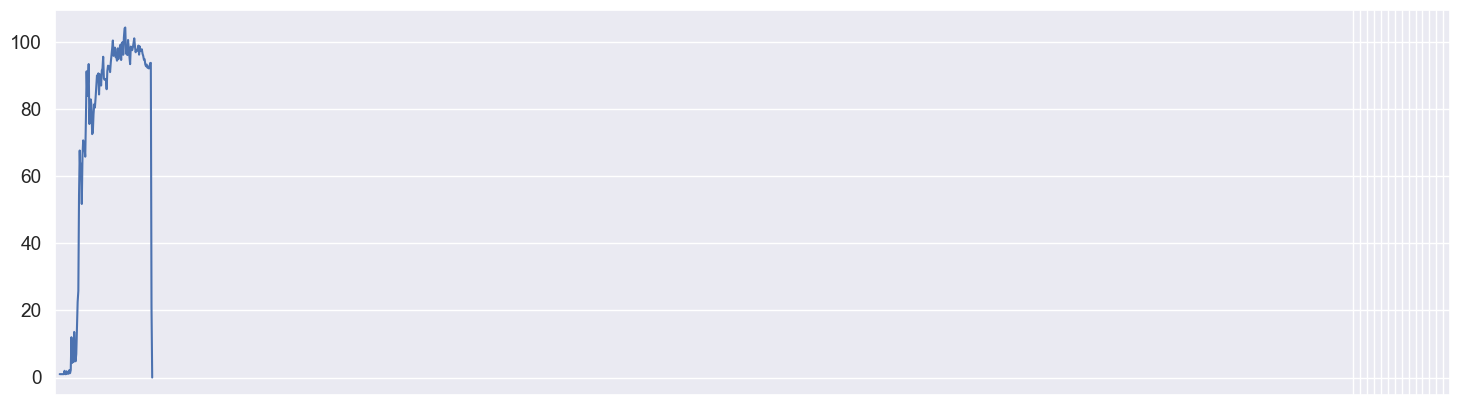

In [102]:
plt.figure(figsize=(18,5))
year_runtime = df[df['year'] != 'NaT'].groupby('year')['runtime'].mean()
plt.plot(year_runtime.index, year_runtime)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

In [103]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
35146,1.0,La Vague,1891
36577,1.0,Champs de Mars,1900
36576,1.0,Palace of Electricity,1900
44965,1.0,"Luis Martinetti, Contortionist",1894
42357,1.0,A Gathering of Cats,2007
36575,1.0,Eiffel Tower from Trocadero Palace,1900
36574,1.0,Panorama of Eiffel Tower,1900
44714,1.0,The Infernal Caldron,1903
19244,1.0,The Kiss,1896
44646,1.0,The Vanishing Lady,1896


In [104]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
40938,1140.0,Baseball,1994
19965,1140.0,Jazz,2001
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


In [105]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

C:\Windows\Temp\ipykernel_7388\1917904569.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['budget'].notnull()]['budget'])


<Axes: xlabel='budget', ylabel='Density'>

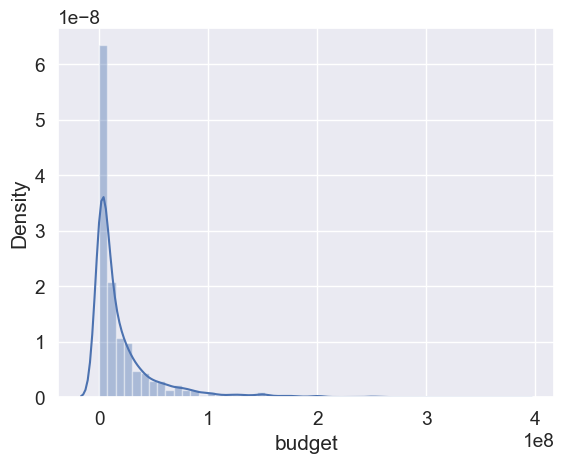

In [106]:
sns.distplot(df[df['budget'].notnull()]['budget'])

<Axes: ylabel='Frequency'>

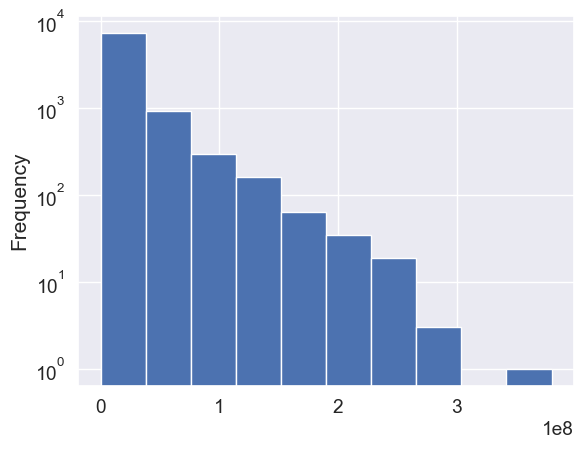

In [107]:
df['budget'].plot(logy=True, kind='hist')

In [108]:
df[df['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17124,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09,2.751878,2011
11827,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08,3.203333,2007
26558,Avengers: Age of Ultron,280000000.0,1.405404e+09,5.019299,2015
11067,Superman Returns,270000000.0,3.910812e+08,1.448449,2006
44842,Transformers: The Last Knight,260000000.0,6.049421e+08,2.326701,2017
16130,Tangled,260000000.0,5.917949e+08,2.276134,2010
18685,John Carter,260000000.0,2.841391e+08,1.092843,2012
11780,Spider-Man 3,258000000.0,8.908716e+08,3.452991,2007
21175,The Lone Ranger,255000000.0,8.928991e+07,0.350157,2013
22059,The Hobbit: The Desolation of Smaug,250000000.0,9.584000e+08,3.833600,2013


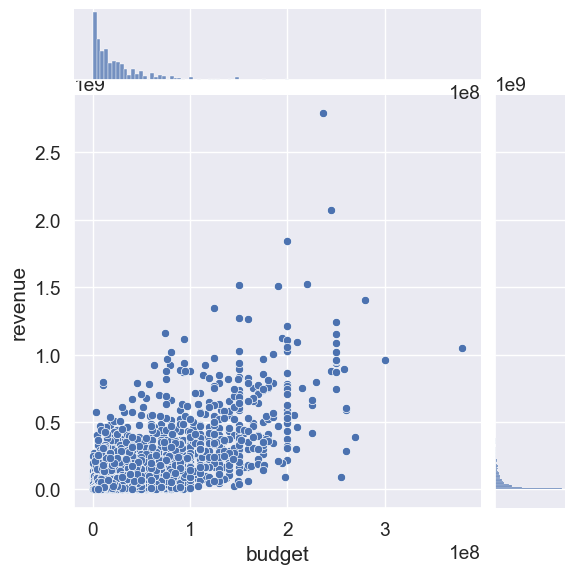

In [109]:
sns.jointplot(x='budget',y='revenue',data=df[df['return'].notnull()])

In [110]:
df['budget'].corr(df['revenue'])

0.7302708168889315

In [111]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

C:\Windows\Temp\ipykernel_7388\3976772722.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['revenue'].notnull()]['revenue'])


<Axes: xlabel='revenue', ylabel='Density'>

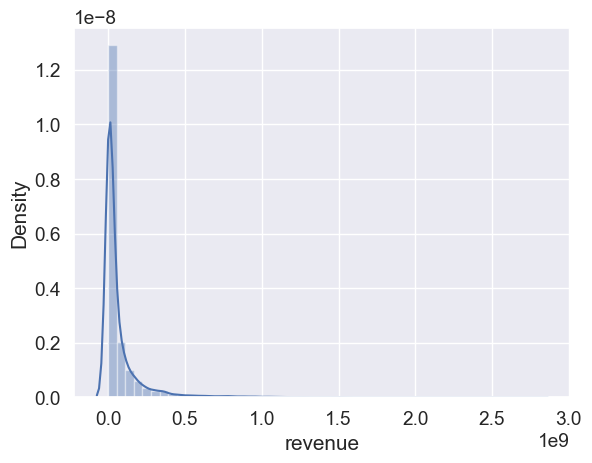

In [112]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

In [113]:
gross_top = df[['poster_path', 'title', 'budget', 'revenue', 'year']].sort_values('revenue', ascending=False).head(10)
pd.set_option('display.max_colwidth', 100)
HTML(gross_top.to_html(escape=False))

,poster_path,title,budget,revenue,year
14551,,Avatar,237000000.0,2.787965e+09,2009
26555,,Star Wars: The Force Awakens,245000000.0,2.068224e+09,2015
1639,,Titanic,200000000.0,1.845034e+09,1997
17818,,The Avengers,220000000.0,1.519558e+09,2012
25084,,Jurassic World,150000000.0,1.513529e+09,2015
28830,,Furious 7,190000000.0,1.506249e+09,2015
26558,,Avengers: Age of Ultron,280000000.0,1.405404e+09,2015
17437,,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.342000e+09,2011
22110,,Frozen,150000000.0,1.274219e+09,2013
42222,,Beauty and the Beast,160000000.0,1.262886e+09,2017


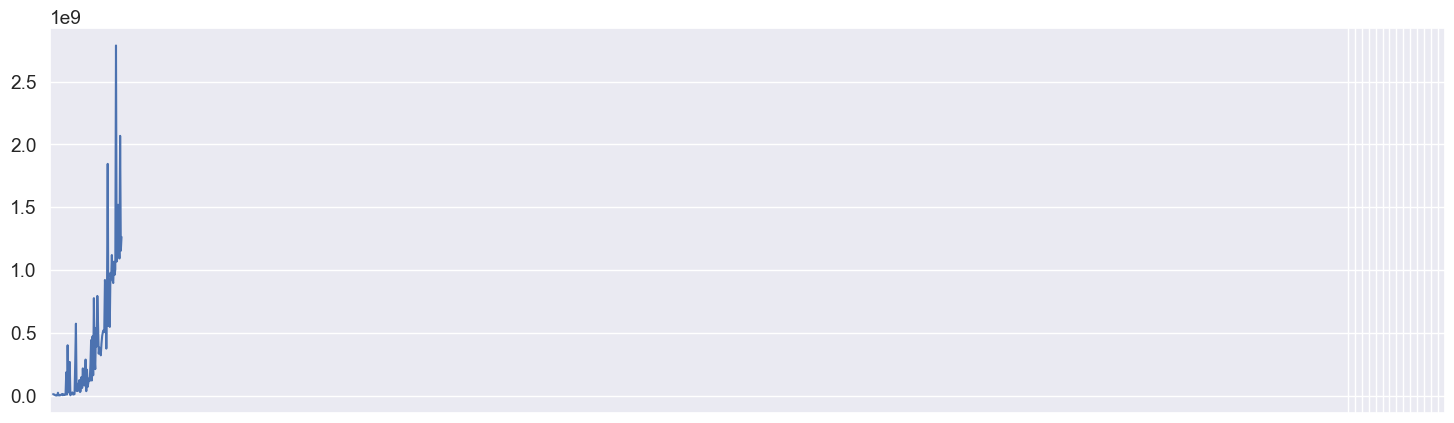

In [114]:
plt.figure(figsize=(18,5))
year_revenue = df[(df['revenue'].notnull()) & (df['year'] != 'NaT')].groupby('year')['revenue'].max()
plt.plot(year_revenue.index, year_revenue)
plt.xticks(np.arange(1874, 2024, 10.0))
plt.show()

In [115]:
df[(df['return'].notnull()) & (df['budget'] > 5e6)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)


,title,budget,revenue,return,year
1065,E.T. the Extra-Terrestrial,10500000.0,792965326.0,75.520507,1982
256,Star Wars,11000000.0,775398007.0,70.490728,1977
1338,Jaws,7000000.0,470654000.0,67.236286,1975
1888,The Exorcist,8000000.0,441306145.0,55.163268,1973
352,Four Weddings and a Funeral,6000000.0,254700832.0,42.450139,1994
834,The Godfather,6000000.0,245066411.0,40.844402,1972
4492,Look Who's Talking,7500000.0,296000000.0,39.466667,1989
24258,Annabelle,6500000.0,255273813.0,39.272894,2014
1056,Dirty Dancing,6000000.0,213954274.0,35.659046,1987
1006,The Sound of Music,8200000.0,286214286.0,34.904181,1965


In [116]:
df[(df['return'].notnull()) & (df['budget'] > 5e6) & (df['revenue'] > 10000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return').head(10)


,title,budget,revenue,return,year
11159,Chaos,20000000.0,10289.0,0.000514,2005
19027,5 Days of War,20000000.0,17479.0,0.000874,2011
21034,Special Forces,10000000.0,10759.0,0.001076,2011
25732,Foodfight!,65000000.0,73706.0,0.001134,2012
38388,Term Life,16500000.0,21256.0,0.001288,2016
19505,Laurence Anyways,9500000.0,12250.0,0.001289,2012
12038,The Good Night,15000000.0,20380.0,0.001359,2007
3966,Cherry 2000,10000000.0,14000.0,0.001400,1987
22097,Twice Born,13000000.0,18295.0,0.001407,2012
5651,All The Queen's Men,15000000.0,23000.0,0.001533,2001


In [117]:
df['year'] = df['year'].replace('NaT', np.nan)
df['year'] = df['year'].apply(clean_numeric)

In [118]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [119]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_df = df.drop('genres', axis=1).join(s)

C:\Windows\Temp\ipykernel_7388\400877601.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


In [120]:
gen_df['genre'].value_counts().shape[0]

32

In [121]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)


,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


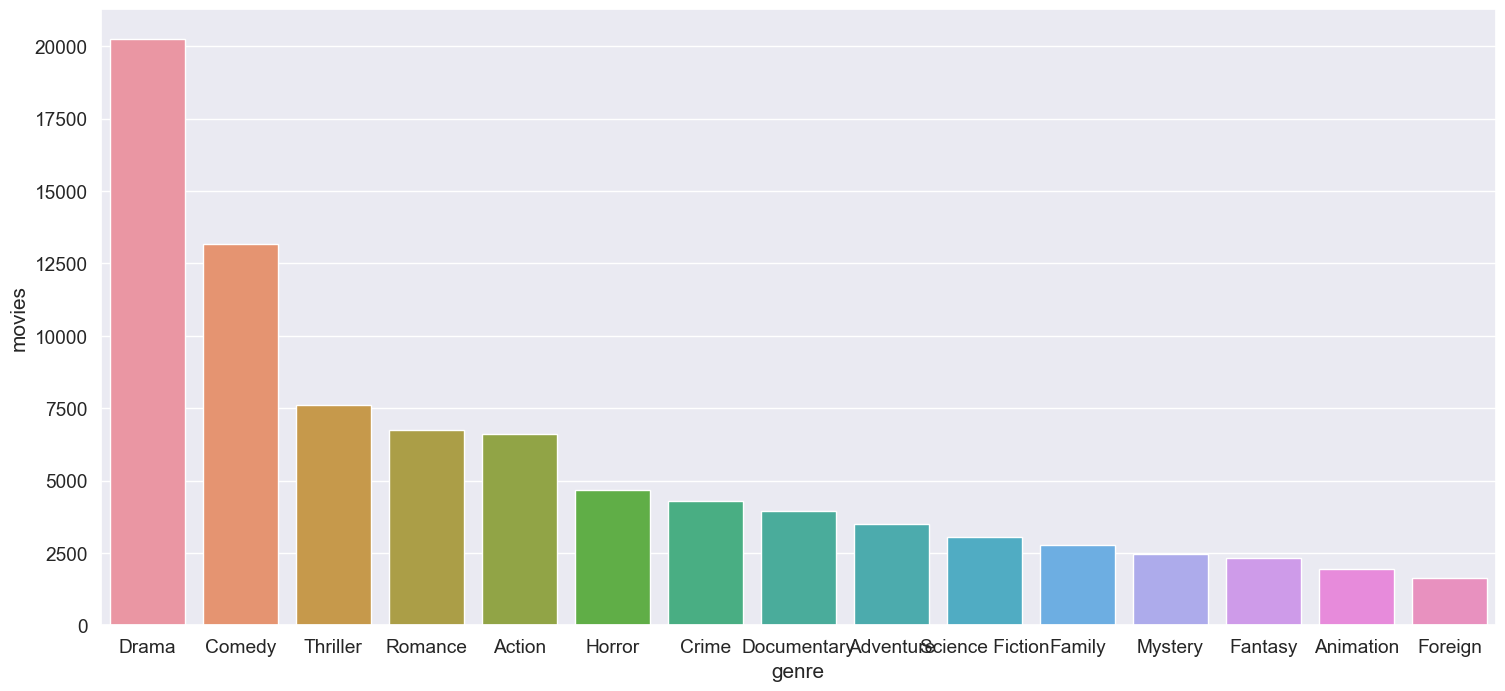

In [122]:
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.show()

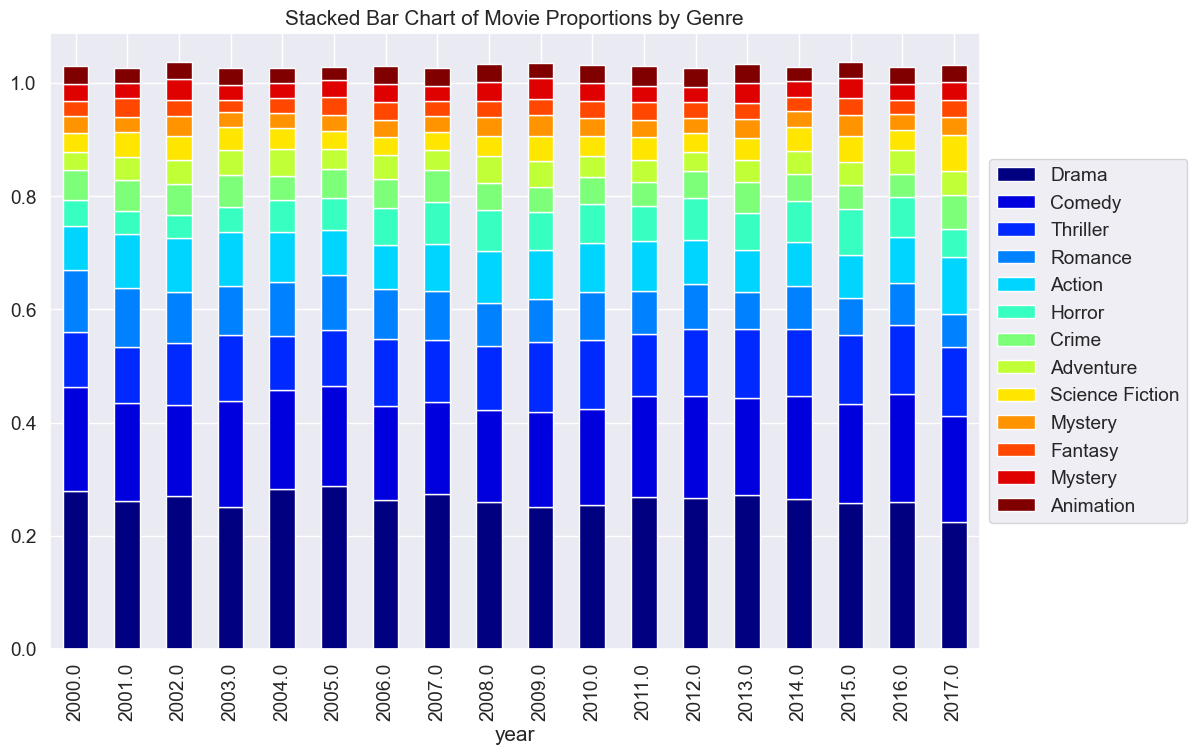

In [123]:
genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Adventure', 'Science Fiction', 'Mystery', 'Fantasy', 'Mystery', 'Animation']
pop_gen_movies = gen_df[(gen_df['genre'].isin(genres)) & (gen_df['year'] >= 2000) & (gen_df['year'] <= 2017)]
ctab = pd.crosstab([pop_gen_movies['year']], pop_gen_movies['genre']).apply(lambda x: x/x.sum(), axis=1)
ctab[genres].plot(kind='bar', stacked=True, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Stacked Bar Chart of Movie Proportions by Genre")
plt.show()

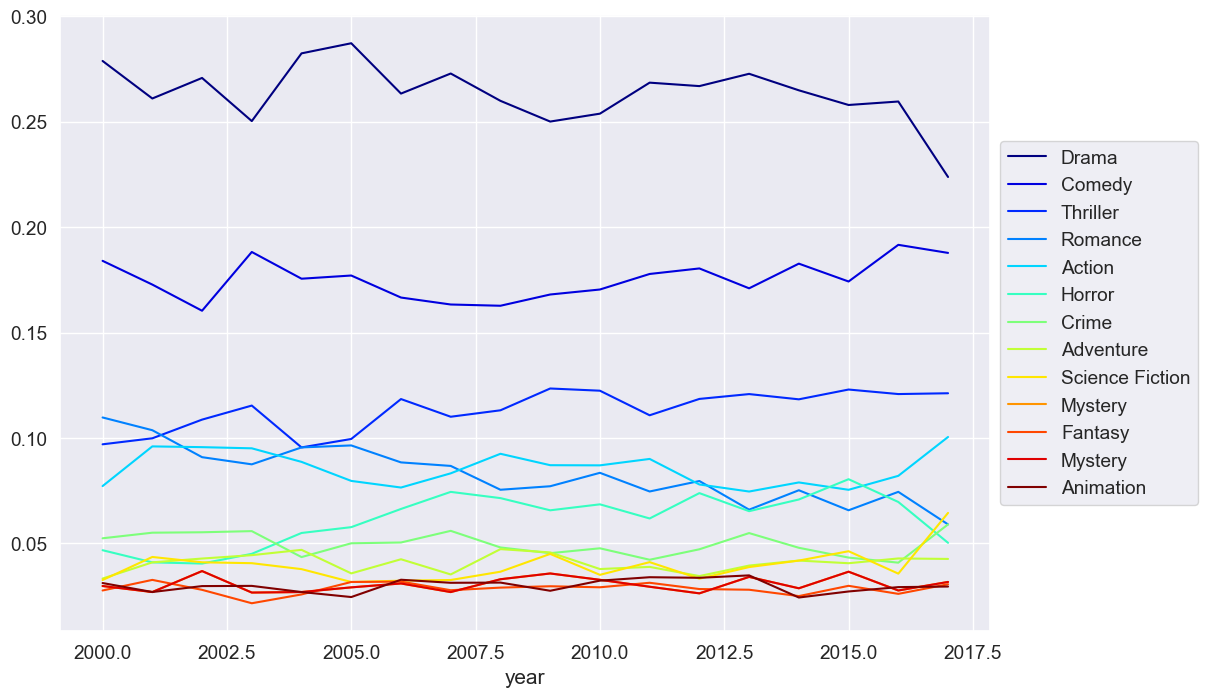

In [124]:
ctab[genres].plot(kind='line', stacked=False, colormap='jet', figsize=(12,8)).legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [125]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1800x800 with 0 Axes>

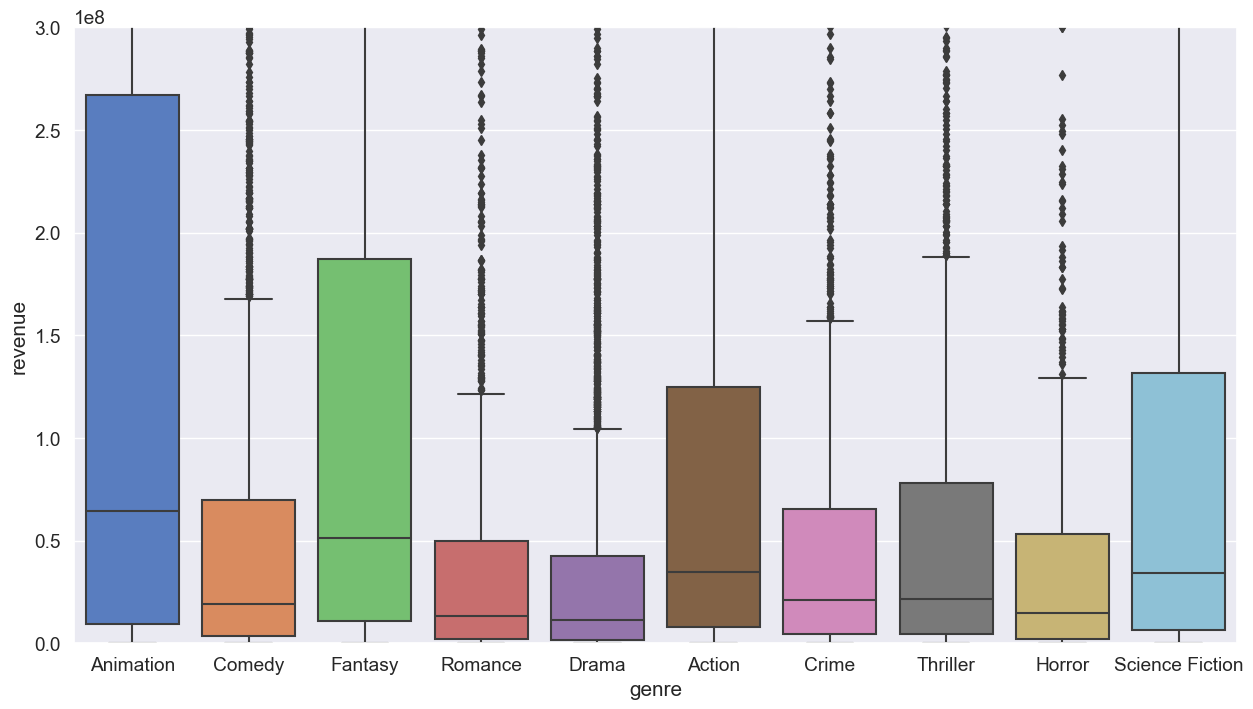

In [126]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='revenue', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 3e8])
plt.show()

<Figure size 1800x800 with 0 Axes>

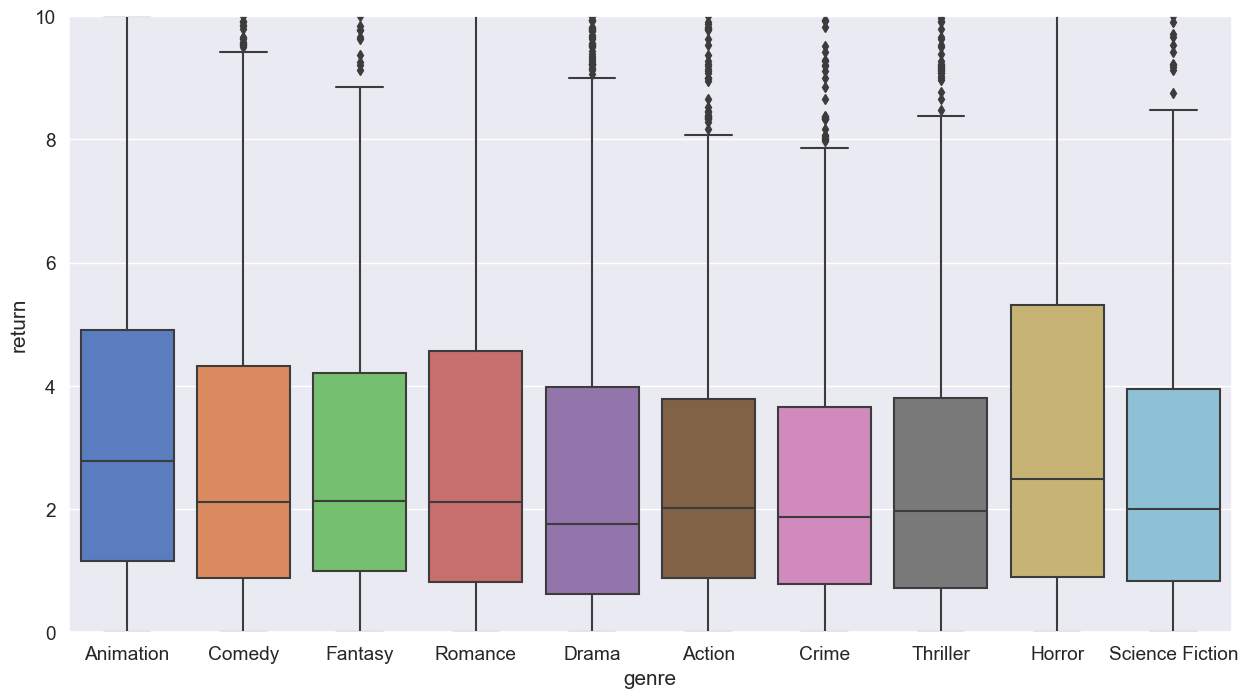

In [127]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.show()


In [128]:
credits_df = pd.read_csv('d:DATASET/Movie_recommendation/dataset2/credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'credit_id': '52fe466a9251416c75077a8d', 'gender': 2...","[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, ...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah' Jackson"", 'credit_id': '52fe44779251416c91011aad...","[{'credit_id': '52fe44779251416c91011acb', 'department': 'Directing', 'gender': 2, 'id': 2178, '...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', 'credit_id': '52fe44959251416c75039eb9', 'gender': ...","[{'credit_id': '52fe44959251416c75039ed7', 'department': 'Sound', 'gender': 2, 'id': 37, 'job': ...",11862


In [129]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

In [130]:
df['id'] = df['id'].apply(convert_int)
df[df['id'].isnull()]


,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,status,tagline,title,video,vote_average,vote_count,return,year,day,month
19730,0.065736,NaN,"[Carousel Productions, Vision View Entertainment, Telescene Film Group Productions]","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'LU', 'name': 'Luxembourg'}, {'iso_3166_...",NaN,104.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Midnight Man' style='height:100px;'>,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,1.931659,NaN,"[Aniplex, GoHands, BROSTA TV, Mardock Scramble Production Committee, Sentai Filmworks]","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'JP', 'name': 'Japan'}]",NaN,68.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Mardock Scramble: The Third Exhaust' style='height:100p...,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,2.185485,NaN,"[Odyssey Media, Pulser Productions, Rogue State, The Cartel]","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,82.0,Released,NaN,<img src='http://image.tmdb.org/t/p/w185/Avalanche Sharks' style='height:100px;'>,[],...,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
df = df.drop([19730, 29503, 35587])
df['id'] = df['id'].astype('int')
df = df.merge(credits_df, on='id')
df.shape


(45538, 27)

In [132]:
df['cast'] = df['cast'].apply(ast.literal_eval)
df['crew'] = df['crew'].apply(ast.literal_eval)

In [133]:
df['cast_size'] = df['cast'].apply(lambda x: len(x))
df['crew_size'] = df['crew'].apply(lambda x: len(x))

In [134]:
df['cast'] = df['cast'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [135]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan


In [136]:
df['director'] = df['crew'].apply(get_director)

In [137]:
s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'actor'
cast_df = df.drop('cast', axis=1).join(s)

C:\Windows\Temp\ipykernel_7388\2004331767.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = df.apply(lambda x: pd.Series(x['cast']),axis=1).stack().reset_index(level=1, drop=True)


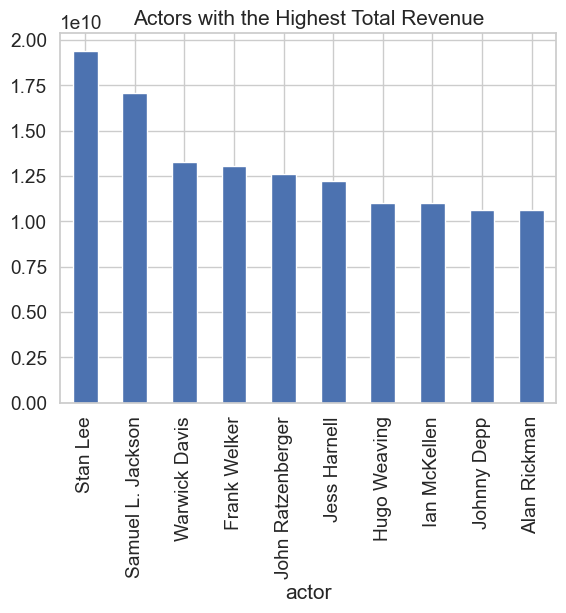

In [138]:
sns.set_style('whitegrid')
plt.title('Actors with the Highest Total Revenue')
cast_df.groupby('actor')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.show()

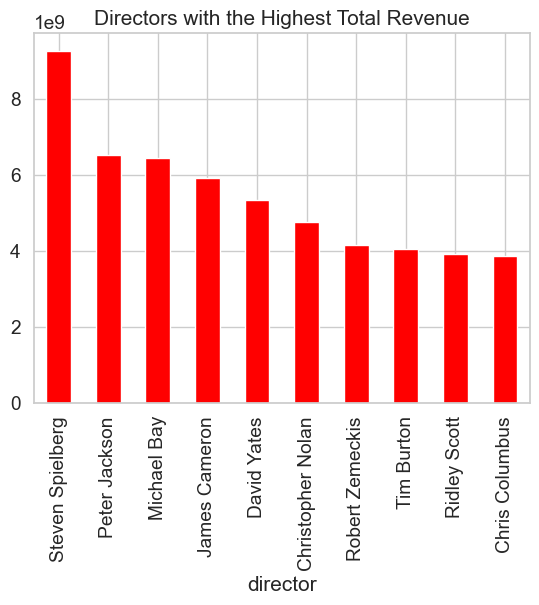

In [139]:
plt.title('Directors with the Highest Total Revenue')
df.groupby('director')['revenue'].sum().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn')
plt.show()


In [140]:
actor_list = cast_df.groupby('actor')['revenue'].count().sort_values(ascending=False)
actor_list = list(actor_list[actor_list >= 5].index)
director_list = df.groupby('director')['revenue'].count().sort_values(ascending=False)
director_list = list(director_list[director_list >= 5].index)

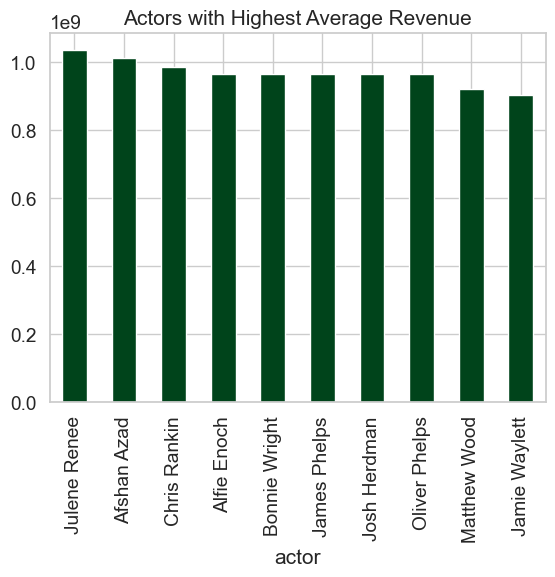

In [141]:
plt.title("Actors with Highest Average Revenue")
cast_df[cast_df['actor'].isin(actor_list)].groupby('actor')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='Greens_r')
plt.show()


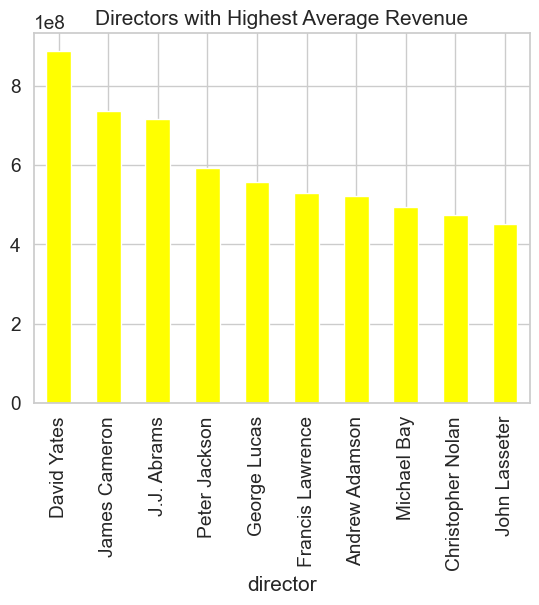

In [142]:
plt.title("Directors with Highest Average Revenue")
df[df['director'].isin(director_list)].groupby('director')['revenue'].mean().sort_values(ascending=False).head(10).plot(kind='bar', colormap='autumn_r')
plt.show()


In [143]:
success_df = cast_df[(cast_df['return'].notnull()) & (cast_df['revenue'] > 1e7) & (cast_df['actor'].isin(actor_list))]
pd.DataFrame(success_df.groupby('actor')['return'].mean().sort_values(ascending=False).head(10))

,return
actor,
Jami Gertz,3.099099e+06
Donna Mitchell,2.479289e+06
Andrew McCarthy,2.479280e+06
Nicholas Pryor,1.770914e+06
James Spader,1.549551e+06
Michael Bowen,1.033038e+06
Robert Downey Jr.,5.165189e+05
Martin Kove,3.395458e+05
William Zabka,3.395441e+05


In [144]:
success_df = df[(df['return'].notnull()) & (df['revenue'] > 1e7) & (df['director'].isin(director_list))]
pd.DataFrame(success_df.groupby('director')['return'].mean().sort_values(ascending=False).head(10))

,return
director,
John G. Avildsen,169822.750468
George A. Romero,60.656935
George Lucas,54.328446
Martha Coolidge,49.553131
Davis Guggenheim,46.243000
George Miller,39.076975
James Wan,27.659835
Guy Hamilton,25.779057
John Badham,25.433532


In [145]:
df[(df['director'] == 'John G. Avildsen') & (df['return'].notnull())][['title', 'budget', 'revenue', 'return', 'year']]

,title,budget,revenue,return,year
1853,Rocky,1000000.0,117235147.0,1.172351e+02,1976.0
2307,Rocky V,42000000.0,119946358.0,2.855866e+00,1990.0
2315,The Karate Kid,8000000.0,90815558.0,1.135194e+01,1984.0
2316,"The Karate Kid, Part II",113.0,115103979.0,1.018619e+06,1986.0
5226,Joe,106000.0,19319254.0,1.822571e+02,1970.0
5658,Neighbors,8500000.0,29916207.0,3.519554e+00,1981.0


In [146]:
rgf = df[df['return'].notnull()]
rgf.shape

(5393, 30)

In [147]:
rgf.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year', 'day', 'month',
       'cast', 'crew', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [148]:
rgf = rgf.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'video', 'return', 'crew'], axis=1)

In [149]:
s = rgf.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_rgf = rgf.drop('genres', axis=1).join(s)
genres_train = gen_rgf['genre'].drop_duplicates()

C:\Windows\Temp\ipykernel_7388\909159705.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = rgf.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


In [150]:
def feature_engineering(df):
    df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x: 0 if x == np.nan else 1)
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df['homepage'] = df['homepage'].apply(lambda x: 0 if x == np.nan else 1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title', 'cast', 'director'], axis=1)
    df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    return df


In [151]:
X, y = rgf.drop('revenue', axis=1), rgf['revenue']
X = feature_engineering(X)
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25)
X.shape


(5393, 38)

In [152]:
reg = GradientBoostingRegressor()
reg.fit(train_X, train_y)
reg.score(test_X, test_y)


0.7642716295429404

In [153]:
dummy = DummyRegressor()
dummy.fit(train_X, train_y)
dummy.score(test_X, test_y)


-0.000723747057805646

<Axes: >

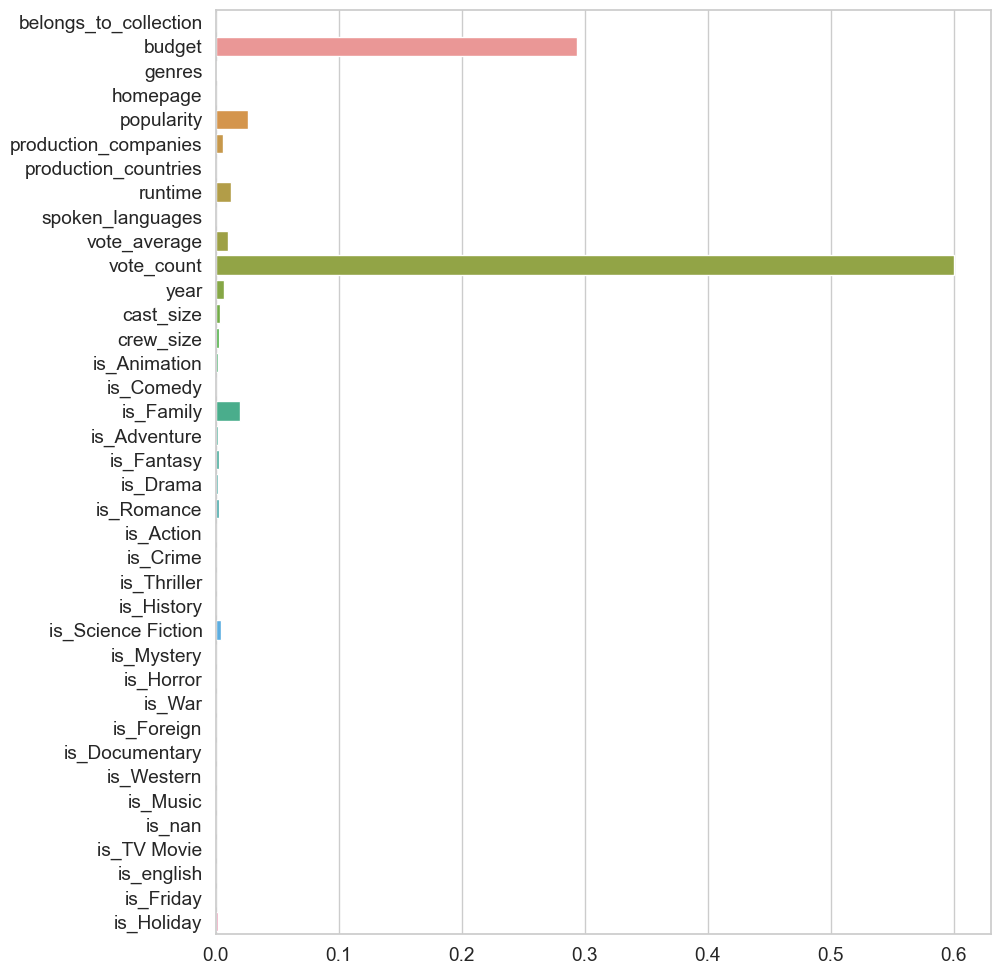

In [154]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,12))
sns.barplot(x=reg.feature_importances_, y=X.columns)

In [155]:
cls = df[df['return'].notnull()]
cls.shape


(5393, 30)

In [156]:
cls.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year', 'day', 'month',
       'cast', 'crew', 'cast_size', 'crew_size', 'director'],
      dtype='object')

In [157]:
cls = cls.drop(['id', 'overview', 'poster_path', 'release_date', 'status', 'tagline', 'revenue'], axis=1)


In [158]:
cls['return'] = cls['return'].apply(lambda x: 1 if x >=1 else 0)


In [159]:
cls['return'].value_counts()


1    3784
0    1609
Name: return, dtype: int64

In [160]:
cls['belongs_to_collection'] = cls['belongs_to_collection'].fillna('').apply(lambda x: 0 if x == '' else 1)


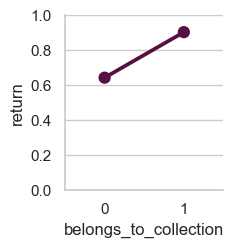

In [161]:
sns.set(style="whitegrid")
g = sns.PairGrid(data=cls, x_vars=['belongs_to_collection'], y_vars='return')
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))


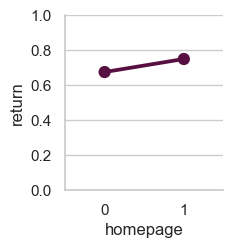

In [162]:
cls['homepage'] = cls['homepage'].fillna('').apply(lambda x: 0 if x == '' else 1)
g = sns.PairGrid(data=cls, x_vars=['homepage'], y_vars='return')
g.map(sns.pointplot, color=sns.xkcd_rgb["plum"])
g.set(ylim=(0, 1))


C:\Windows\Temp\ipykernel_7388\4053934560.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  s = cls.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)


<Axes: xlabel='genre'>

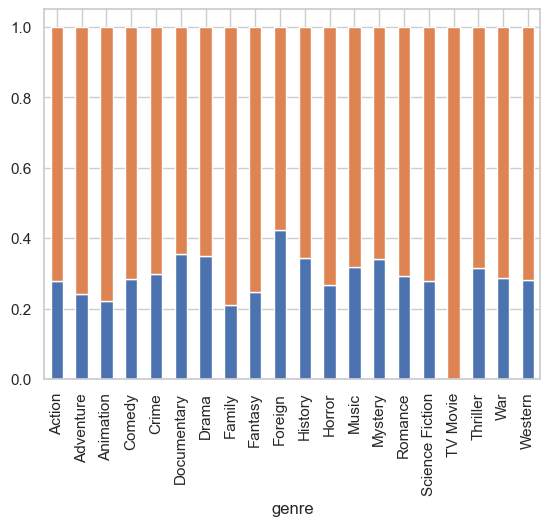

In [163]:
s = cls.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_cls = cls.drop('genres', axis=1).join(s)
ctab = pd.crosstab([gen_cls['genre']], gen_cls['return'], dropna=False).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind='bar', stacked=True, legend=False)


In [164]:
def classification_engineering(df):
    for genre in genres_train:
        df['is_' + str(genre)] = df['genres'].apply(lambda x: 1 if genre in x else 0)
    df['genres'] = df['genres'].apply(lambda x: len(x))
    df = df.drop('homepage', axis=1)
    df['is_english'] = df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    df = df.drop('original_language', axis=1)
    df['production_companies'] = df['production_companies'].apply(lambda x: len(x))
    df['production_countries'] = df['production_countries'].apply(lambda x: len(x))
    df['is_Friday'] = df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    df = df.drop('day', axis=1)
    df['is_Holiday'] = df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    df = df.drop('month', axis=1)
    df = df.drop(['title', 'cast', 'director'], axis=1)
    #df = pd.get_dummies(df, prefix='is')
    df['runtime'] = df['runtime'].fillna(df['runtime'].mean())
    df['vote_average'] = df['vote_average'].fillna(df['vote_average'].mean())
    df = df.drop('crew', axis=1)
    return df

In [165]:
cls = classification_engineering(cls)
cls.columns


Index(['belongs_to_collection', 'budget', 'genres', 'popularity',
       'production_companies', 'production_countries', 'runtime',
       'spoken_languages', 'video', 'vote_average', 'vote_count', 'return',
       'year', 'cast_size', 'crew_size', 'is_Animation', 'is_Comedy',
       'is_Family', 'is_Adventure', 'is_Fantasy', 'is_Drama', 'is_Romance',
       'is_Action', 'is_Crime', 'is_Thriller', 'is_History',
       'is_Science Fiction', 'is_Mystery', 'is_Horror', 'is_War', 'is_Foreign',
       'is_Documentary', 'is_Western', 'is_Music', 'is_nan', 'is_TV Movie',
       'is_english', 'is_Friday', 'is_Holiday'],
      dtype='object')

In [166]:
X, y = cls.drop('return', axis=1), cls['return']
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.75, test_size=0.25, stratify=y)
clf = GradientBoostingClassifier()
clf.fit(train_X, train_y)
clf.score(test_X, test_y)

0.7946627131208303

In [167]:
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(train_X, train_y)
dummy.score(test_X, test_y)


0.7020014825796886

<Axes: >

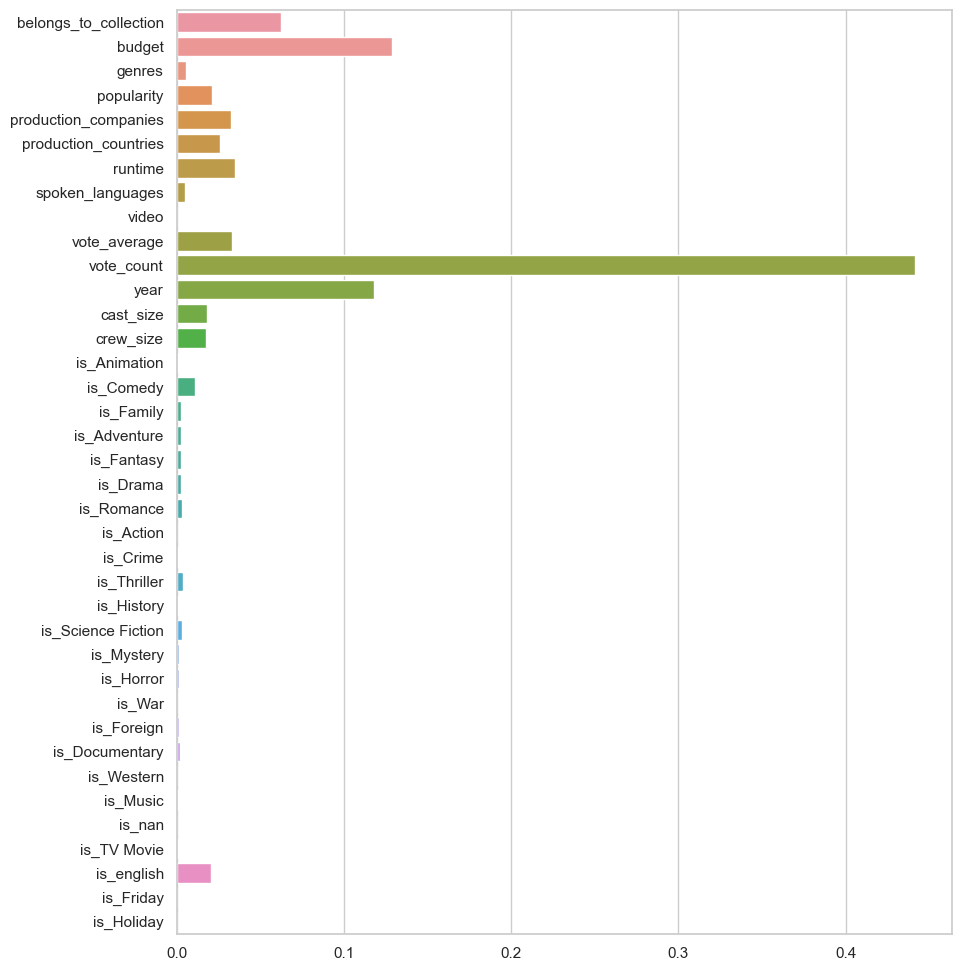

In [168]:
plt.figure(figsize=(10,12))
sns.barplot(x=clf.feature_importances_, y=X.columns)


In [169]:
def box_outliers(column, dataframe):  
    q1 = np.quantile(dataframe[column].dropna(), 0.25)
    q3 = np.quantile(dataframe[column].dropna(), 0.75)
    iqr = q3 - q1 
    upper = dataframe[dataframe[column] > 1.5*iqr + q3 ]
    print("Upper Outliers :")
    print(list(upper[column]))
    
    lower = dataframe[dataframe[column] < q1 - 1.5*iqr ]
    print("Lower Outliers =") 
    print(list(lower[column]))
    
    plt.boxplot(dataframe[column].dropna())
    plt.title("Boxplot of " + column)
    plt.show()


In [170]:
df.head(1)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,poster_path,production_companies,...,vote_count,return,year,day,month,cast,crew,cast_size,crew_size,director
0,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",30000000.0,"[Animation, Comedy, Family]",http://toystory.disney.com/toy-story,862,en,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",21.946943,<img src='http://image.tmdb.org/t/p/w185//rhIRbceoE9lR4veEXuwCC2wARtG.jpg' style='height:100px;'>,[Pixar Animation Studios],...,5415.0,12.451801,1995.0,Mon,Oct,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney, Wallace Shawn, John Ratzenberger, Annie Potts, J...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",13,106,John Lasseter


Upper Outliers :
[65000000.0, 60000000.0, 62000000.0, 98000000.0, 60000000.0, 72000000.0, 60000000.0, 100000000.0, 90000000.0, 90000000.0, 60000000.0, 175000000.0, 60000000.0, 60000000.0, 60000000.0, 62000000.0, 115000000.0, 63000000.0, 70000000.0, 63000000.0, 85000000.0, 100000000.0, 80000000.0, 80000000.0, 75000000.0, 92000000.0, 75000000.0, 100000000.0, 100000000.0, 80000000.0, 80000000.0, 60000000.0, 67000000.0, 65000000.0, 60000000.0, 70000000.0, 80000000.0, 60000000.0, 70000000.0, 80000000.0, 70000000.0, 116000000.0, 68000000.0, 90000000.0, 90000000.0, 85000000.0, 90000000.0, 73000000.0, 75000000.0, 160000000.0, 125000000.0, 85000000.0, 80000000.0, 90000000.0, 90000000.0, 60000000.0, 75000000.0, 85000000.0, 70000000.0, 60000000.0, 105000000.0, 60000000.0, 60000000.0, 70000000.0, 80000000.0, 200000000.0, 110000000.0, 80000000.0, 60000000.0, 70000000.0, 75000000.0, 60000000.0, 65000000.0, 80000000.0, 60000000.0, 75000000.0, 130000000.0, 60000000.0, 70000000.0, 90000000.0, 66000000.

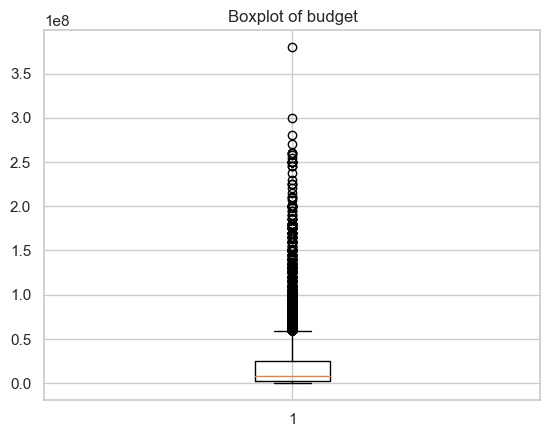

In [171]:
box_outliers('budget', df)    

Upper Outliers :
[5415.0, 2413.0, 92.0, 173.0, 1886.0, 141.0, 174.0, 1194.0, 199.0, 210.0, 423.0, 137.0, 1343.0, 364.0, 539.0, 1128.0, 224.0, 305.0, 199.0, 394.0, 143.0, 365.0, 91.0, 308.0, 249.0, 2470.0, 756.0, 350.0, 149.0, 828.0, 452.0, 177.0, 5915.0, 1509.0, 3334.0, 145.0, 181.0, 136.0, 115.0, 192.0, 110.0, 513.0, 1644.0, 154.0, 91.0, 87.0, 86.0, 124.0, 190.0, 113.0, 103.0, 459.0, 695.0, 285.0, 767.0, 397.0, 93.0, 3404.0, 2632.0, 245.0, 139.0, 249.0, 105.0, 110.0, 303.0, 1729.0, 472.0, 1637.0, 151.0, 1529.0, 163.0, 1045.0, 214.0, 508.0, 898.0, 88.0, 2094.0, 319.0, 130.0, 406.0, 380.0, 643.0, 280.0, 87.0, 400.0, 153.0, 359.0, 171.0, 139.0, 111.0, 261.0, 115.0, 457.0, 334.0, 119.0, 112.0, 117.0, 217.0, 168.0, 1017.0, 984.0, 464.0, 769.0, 184.0, 217.0, 91.0, 92.0, 183.0, 1894.0, 639.0, 179.0, 404.0, 91.0, 299.0, 90.0, 97.0, 112.0, 1558.0, 381.0, 124.0, 83.0, 6778.0, 222.0, 207.0, 636.0, 164.0, 272.0, 199.0, 140.0, 128.0, 927.0, 92.0, 106.0, 522.0, 4293.0, 8670.0, 262.0, 431.0, 246.0, 

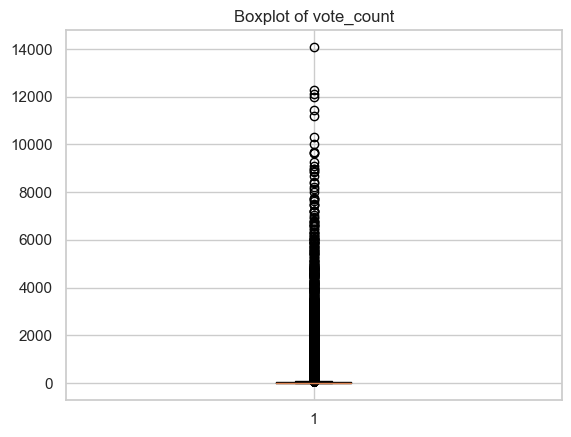

In [172]:
box_outliers('vote_count', df)    

In [173]:
df.corr()

C:\Windows\Temp\ipykernel_7388\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,budget,id,popularity,revenue,runtime,spoken_languages,vote_average,vote_count,return,year,cast_size,crew_size
budget,1.000000,-0.085240,0.368906,0.730240,0.223345,0.111337,0.074468,0.619928,-0.019843,0.192469,0.361935,0.490609
id,-0.085240,1.000000,-0.083435,-0.022096,-0.121153,-0.129993,0.002801,-0.064827,-0.010294,0.286546,-0.133631,-0.078612
popularity,0.368906,-0.083435,1.000000,0.458101,0.129932,0.148041,0.096566,0.559885,-0.008640,0.131783,0.354790,0.439705
revenue,0.730240,-0.022096,0.458101,1.000000,0.202478,0.070603,0.149483,0.781840,-0.011304,0.134558,0.371084,0.415993
runtime,0.223345,-0.121153,0.129932,0.202478,1.000000,0.168744,0.108647,0.113500,-0.013707,0.078940,0.206883,0.144137
spoken_languages,0.111337,-0.129993,0.148041,0.070603,0.168744,1.000000,0.067523,0.108895,0.013476,0.062871,0.159809,0.170103
vote_average,0.074468,0.002801,0.096566,0.149483,0.108647,0.067523,1.000000,0.123047,0.015819,-0.039360,0.054835,0.056849
vote_count,0.619928,-0.064827,0.559885,0.781840,0.113500,0.108895,0.123047,1.000000,-0.008625,0.106735,0.393225,0.520962
return,-0.019843,-0.010294,-0.008640,-0.011304,-0.013707,0.013476,0.015819,-0.008625,1.000000,-0.034578,-0.008596,-0.015480
year,0.192469,0.286546,0.131783,0.134558,0.078940,0.062871,-0.039360,0.106735,-0.034578,1.000000,-0.040245,0.087800


In [174]:
df.cov(ddof=0)

C:\Windows\Temp\ipykernel_7388\3461015677.py:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.cov(ddof=0)


,budget,id,popularity,revenue,runtime,spoken_languages,vote_average,vote_count,return,year,cast_size,crew_size
budget,1.175011e+15,-3.058606e+11,1.443917e+08,4.863964e+15,2.167453e+08,3.452475e+06,2.776223e+06,2.187106e+10,-1.724810e+11,1.140148e+08,2.248876e+08,4.753730e+08
id,-3.058606e+11,1.263457e+10,-5.629209e+04,-3.196667e+11,-5.199104e+05,-1.100722e+04,3.845746e+02,-3.577306e+06,-2.130197e+08,7.728566e+05,-1.814640e+05,-1.396024e+05
popularity,1.443917e+08,-5.629209e+04,3.602654e+01,8.136040e+08,3.001175e+01,6.693427e-01,7.466081e-01,1.649764e+03,-2.583888e+04,1.904283e+01,2.572753e+01,4.169762e+01
revenue,4.863964e+15,-3.196667e+11,8.136040e+08,2.138956e+16,6.357874e+08,9.229543e+06,2.032460e+07,1.263214e+11,-4.064617e+11,3.052831e+08,1.022943e+09,1.832100e+09
runtime,2.167453e+08,-5.199104e+05,3.001175e+01,6.357874e+08,1.474267e+03,4.877740e+00,5.159621e+00,2.145193e+03,-6.541472e+04,7.285337e+01,9.610005e+01,8.761605e+01
spoken_languages,3.452475e+06,-1.100722e+04,6.693427e-01,9.229543e+06,4.877740e+00,5.674831e-01,6.378929e-02,4.026955e+01,2.706241e+03,1.138461e+00,1.454389e+00,2.024479e+00
vote_average,2.776223e+06,3.845746e+02,7.466081e-01,2.032460e+07,5.159621e+00,6.378929e-02,1.577127e+00,7.835522e+01,3.086228e+03,-1.174661e+00,8.436984e-01,1.157294e+00
vote_count,2.187106e+10,-3.577306e+06,1.649764e+03,1.263214e+11,2.145193e+03,4.026955e+01,7.835522e+01,2.410033e+05,-2.336218e+06,1.261697e+03,2.332213e+03,4.040698e+03
return,-1.724810e+11,-2.130197e+08,-2.583888e+04,-4.064617e+11,-6.541472e+04,2.706241e+03,3.086228e+03,-2.336218e+06,4.692221e+10,-1.195312e+05,-3.836624e+04,-1.107128e+05
year,1.140148e+08,7.728566e+05,1.904283e+01,3.052831e+08,7.285337e+01,1.138461e+00,-1.174661e+00,1.261697e+03,-1.195312e+05,5.787742e+02,-1.169786e+01,3.339249e+01


C:\Windows\Temp\ipykernel_7388\41759336.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

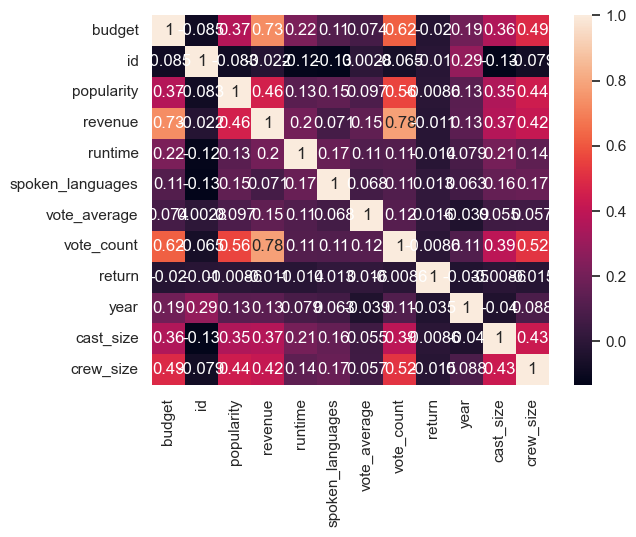

In [176]:
sns.heatmap(df.corr(),
            annot=True)
